# Understanding Data Distributions

This notebook explores various data distributions, their properties, visualization methods, and applications in data science. We'll examine normal, uniform, binomial, Poisson, and skewed distributions, along with techniques to visualize, analyze, and test these distributions.

## Import Required Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set plotting style and figure size
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Display plots inline
%matplotlib inline

## Introduction to Data Distributions

Data distributions describe how values in a dataset are spread out. Understanding distributions is essential for:
- Choosing appropriate statistical methods
- Detecting outliers and anomalies
- Making inferences and predictions
- Applying machine learning algorithms effectively

Let's start by creating some sample data and exploring basic properties.

In [2]:
# Generate a sample dataset
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=50, scale=10, size=1000)

# Calculate basic statistics
mean_val = np.mean(sample_data)
median_val = np.median(sample_data)
std_dev = np.std(sample_data)
variance = np.var(sample_data)
min_val = np.min(sample_data)
max_val = np.max(sample_data)

# Create a pandas Series for easier analysis
s = pd.Series(sample_data)

# Display basic statistics
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Minimum: {min_val:.2f}")
print(f"Maximum: {max_val:.2f}")
print(f"Range: {max_val - min_val:.2f}")

# Display more detailed statistics
s.describe()

Mean: 50.19
Median: 50.25
Standard Deviation: 9.79
Variance: 95.79
Minimum: 17.59
Maximum: 88.53
Range: 70.94


count    1000.000000
mean       50.193321
std         9.792159
min        17.587327
25%        43.524097
50%        50.253006
75%        56.479439
max        88.527315
dtype: float64

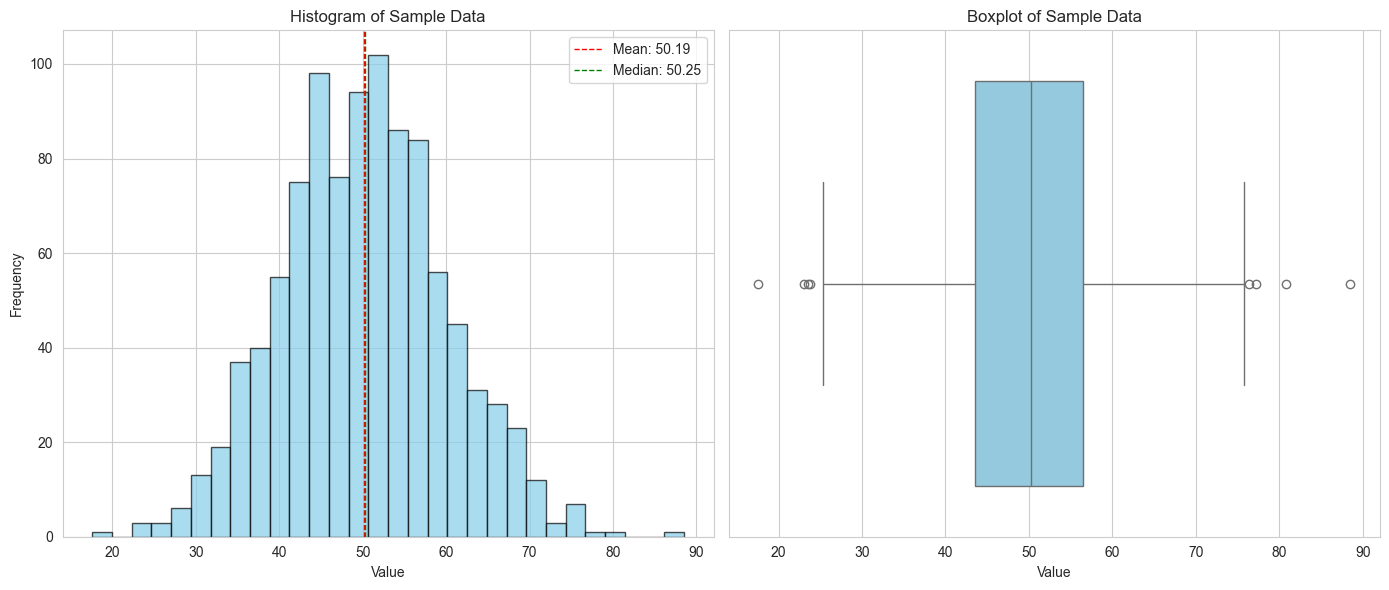

In [3]:
# Let's visualize this sample data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(sample_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x=sample_data, color='skyblue')
plt.title('Boxplot of Sample Data')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

## Normal Distribution

The normal distribution (also known as Gaussian distribution) is one of the most commonly observed distributions in nature. It's characterized by its bell-shaped curve and is fully defined by two parameters:
- Mean (μ): the center of the distribution
- Standard deviation (σ): the spread of the distribution

Key properties:
- Symmetric around the mean
- Mean = Median = Mode
- 68% of data falls within 1 standard deviation of the mean
- 95% of data falls within 2 standard deviations of the mean
- 99.7% of data falls within 3 standard deviations of the mean (Empirical Rule or 68-95-99.7 rule)

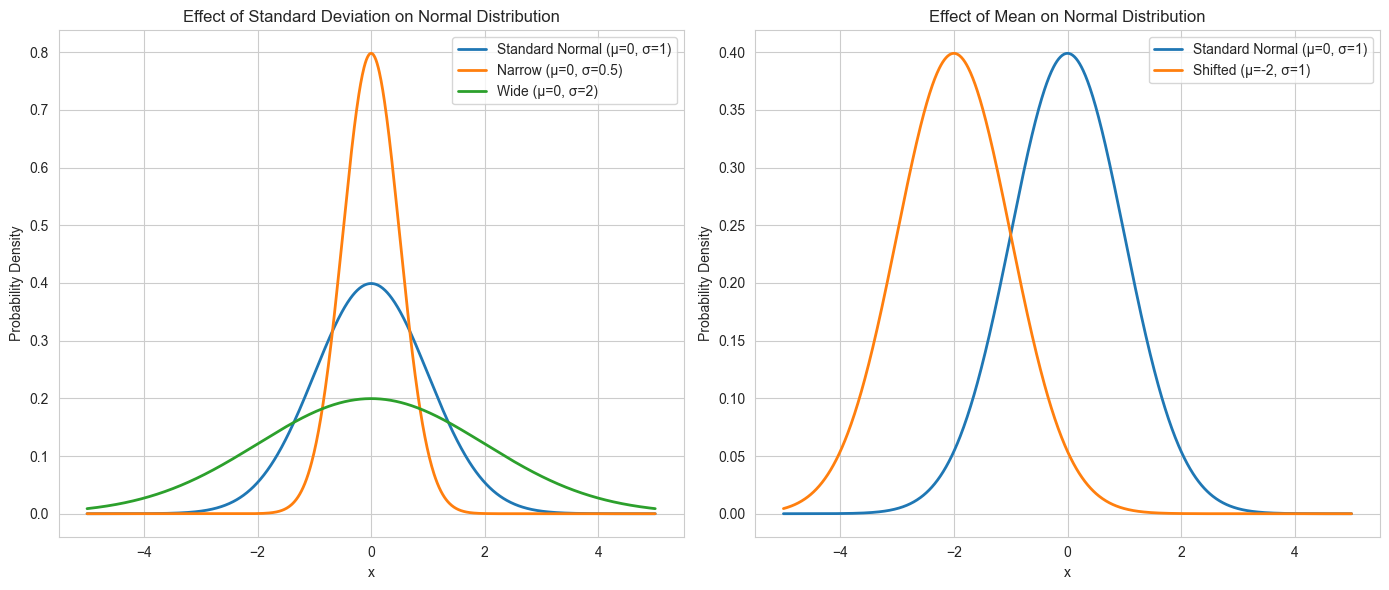

In [4]:
# Generate normal distributions with different parameters
x = np.linspace(-5, 5, 1000)

# Standard normal distribution (μ=0, σ=1)
std_normal = stats.norm.pdf(x, loc=0, scale=1)

# Normal distributions with different parameters
norm_dist1 = stats.norm.pdf(x, loc=0, scale=0.5)  # Narrow
norm_dist2 = stats.norm.pdf(x, loc=0, scale=2)    # Wide
norm_dist3 = stats.norm.pdf(x, loc=-2, scale=1)   # Shifted left

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, std_normal, label='Standard Normal (μ=0, σ=1)', linewidth=2)
plt.plot(x, norm_dist1, label='Narrow (μ=0, σ=0.5)', linewidth=2)
plt.plot(x, norm_dist2, label='Wide (μ=0, σ=2)', linewidth=2)
plt.title('Effect of Standard Deviation on Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, std_normal, label='Standard Normal (μ=0, σ=1)', linewidth=2)
plt.plot(x, norm_dist3, label='Shifted (μ=-2, σ=1)', linewidth=2)
plt.title('Effect of Mean on Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

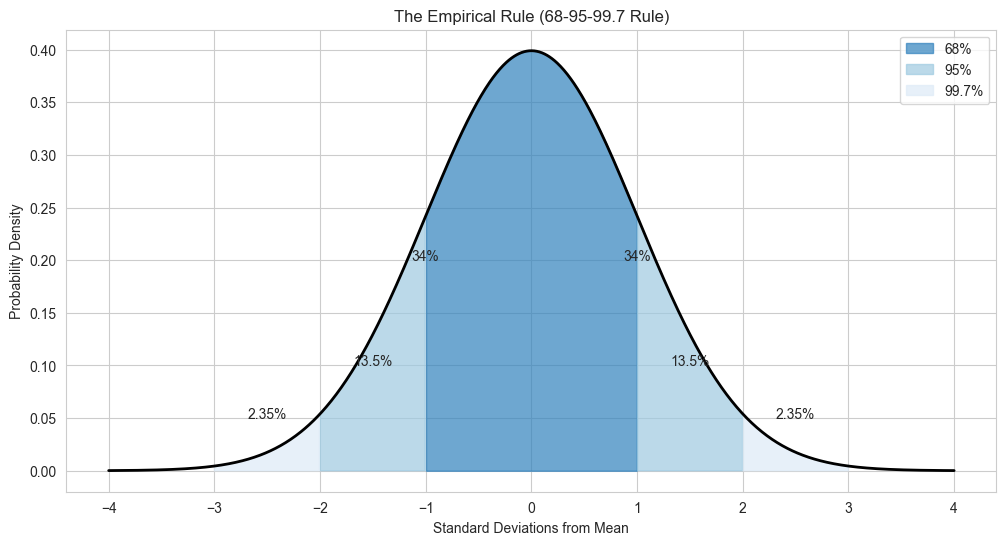

In [5]:
# Visualize the Empirical Rule (68-95-99.7 rule)
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'k-', linewidth=2)
plt.fill_between(x, y, where=(x >= -1) & (x <= 1), color='#3182bd', alpha=0.7, label='68%')
plt.fill_between(x, y, where=(x >= -2) & (x <= 2) & ((x < -1) | (x > 1)), color='#9ecae1', alpha=0.7, label='95%')
plt.fill_between(x, y, where=(x >= -3) & (x <= 3) & ((x < -2) | (x > 2)), color='#deebf7', alpha=0.7, label='99.7%')
plt.title('The Empirical Rule (68-95-99.7 Rule)')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.text(-1, 0.2, '34%', ha='center')
plt.text(1, 0.2, '34%', ha='center')
plt.text(-1.5, 0.1, '13.5%', ha='center')
plt.text(1.5, 0.1, '13.5%', ha='center')
plt.text(-2.5, 0.05, '2.35%', ha='center')
plt.text(2.5, 0.05, '2.35%', ha='center')
plt.grid(True)
plt.show()

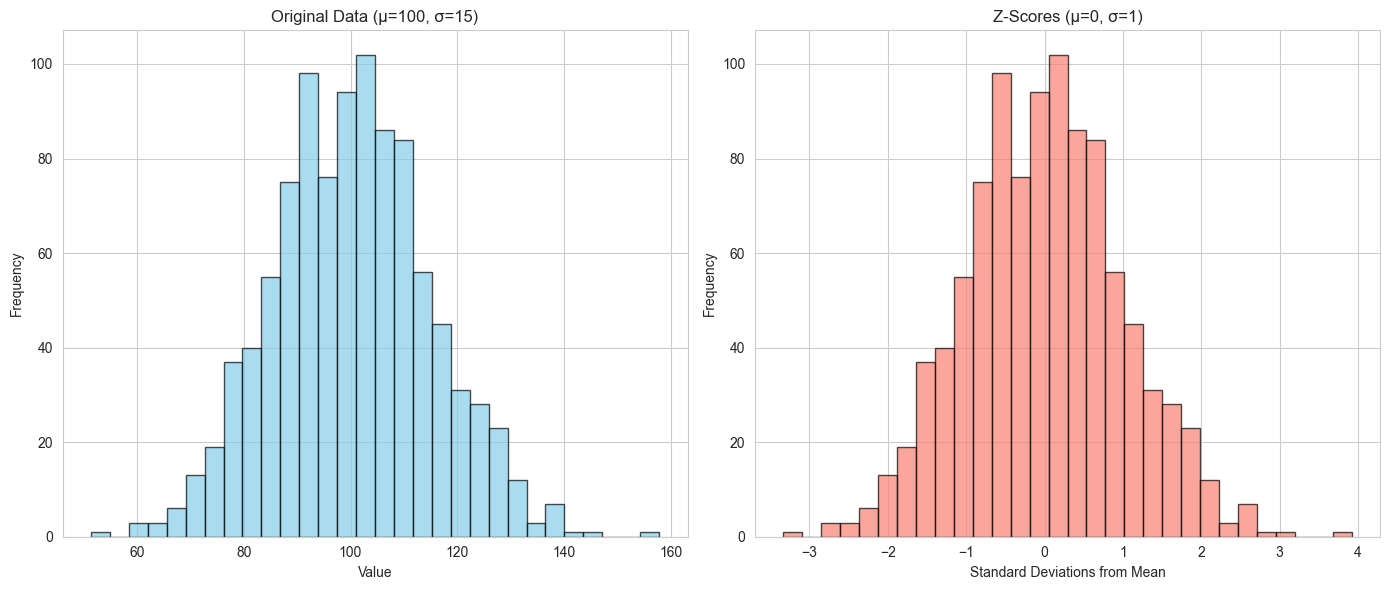

Z-scores mean: 0.0000000000
Z-scores standard deviation: 1.0000000000


In [6]:
# Demonstrate z-scores
np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)

# Calculate z-scores
z_scores = stats.zscore(data)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Original Data (μ=100, σ=15)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=30, alpha=0.7, color='salmon', edgecolor='black')
plt.title('Z-Scores (μ=0, σ=1)')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Verify the mean and standard deviation of the z-scores
print(f"Z-scores mean: {z_scores.mean():.10f}")
print(f"Z-scores standard deviation: {z_scores.std():.10f}")

## Uniform Distribution

The uniform distribution represents a constant probability over a defined range. Each value within the range has an equal likelihood of occurring. It's characterized by:
- A minimum value (a)
- A maximum value (b)

Key properties:
- Mean = (a + b) / 2
- Variance = (b - a)² / 12
- Constant probability density of 1/(b-a) within the range

Uniform Distribution [0, 100]
Theoretical Mean: 50.0
Sample Mean: 49.03
Theoretical Std Deviation: 28.87
Sample Std Deviation: 29.20
Theoretical Variance: 833.33
Sample Variance: 852.59


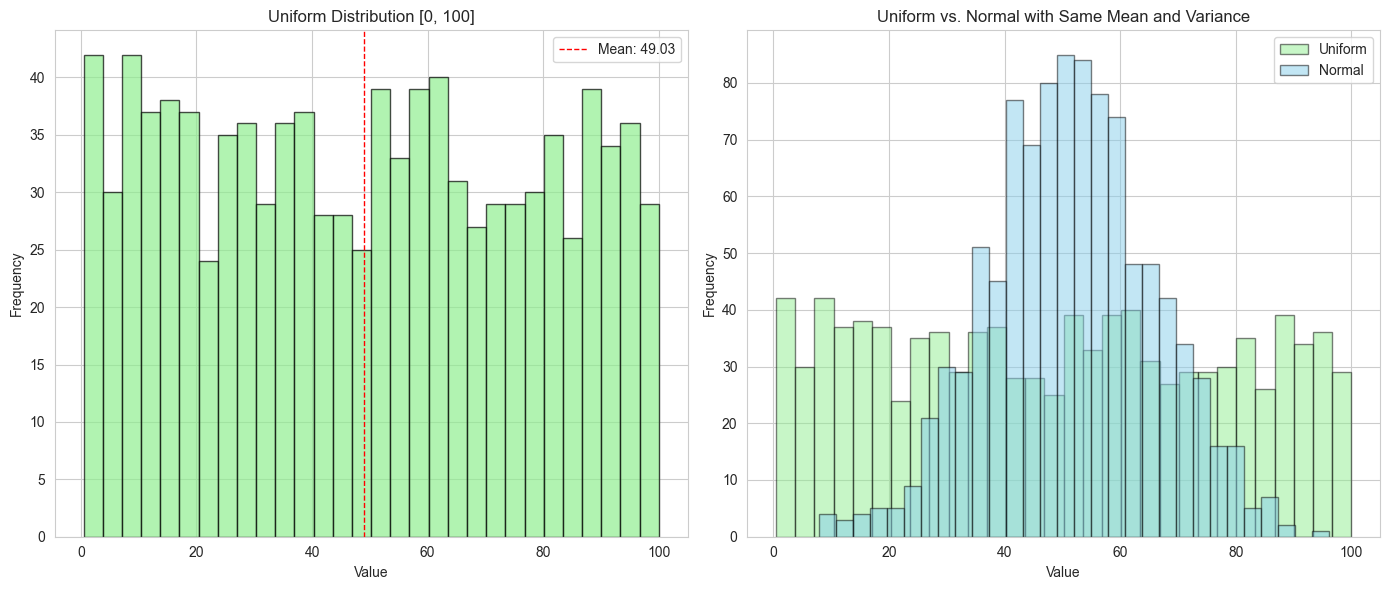

In [7]:
# Generate uniform distributions
np.random.seed(42)
uniform_data = np.random.uniform(0, 100, 1000)

# Calculate theoretical values
min_val = 0
max_val = 100
theoretical_mean = (min_val + max_val) / 2
theoretical_variance = (max_val - min_val)**2 / 12
theoretical_std = np.sqrt(theoretical_variance)

# Calculate sample statistics
sample_mean = np.mean(uniform_data)
sample_std = np.std(uniform_data)
sample_variance = np.var(uniform_data)

# Print theoretical vs. sample statistics
print("Uniform Distribution [0, 100]")
print(f"Theoretical Mean: {theoretical_mean}")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Theoretical Std Deviation: {theoretical_std:.2f}")
print(f"Sample Std Deviation: {sample_std:.2f}")
print(f"Theoretical Variance: {theoretical_variance:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")

# Visualize the uniform distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {sample_mean:.2f}')
plt.title('Uniform Distribution [0, 100]')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Compare with normal distribution
normal_data = np.random.normal(50, 14.43, 1000)  # std = sqrt((100-0)²/12)

plt.subplot(1, 2, 2)
plt.hist(uniform_data, bins=30, alpha=0.5, color='lightgreen', edgecolor='black', label='Uniform')
plt.hist(normal_data, bins=30, alpha=0.5, color='skyblue', edgecolor='black', label='Normal')
plt.title('Uniform vs. Normal with Same Mean and Variance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

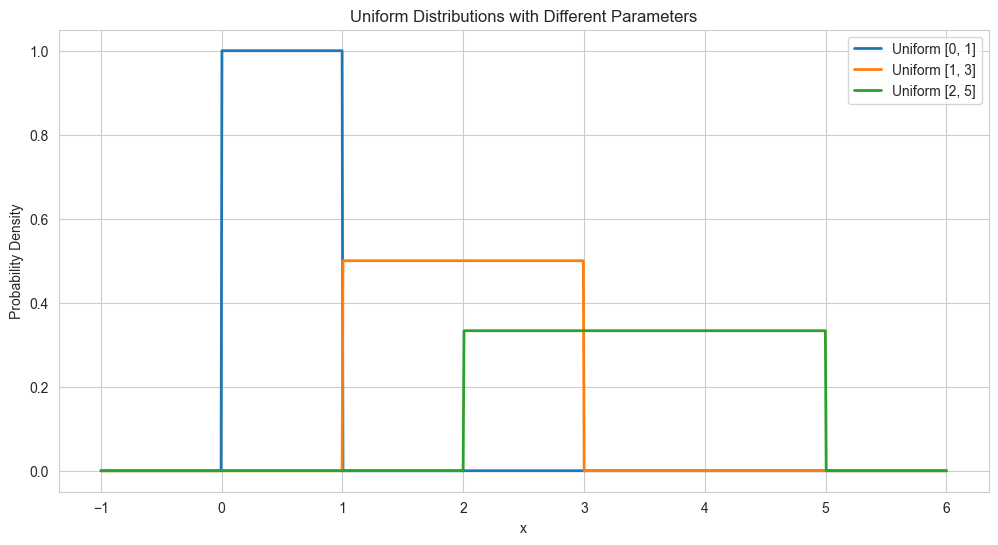

In [8]:
# Probability density function for various uniform distributions
x = np.linspace(-1, 6, 1000)

# Different uniform distributions
uniform1 = stats.uniform.pdf(x, loc=0, scale=1)  # [0, 1]
uniform2 = stats.uniform.pdf(x, loc=1, scale=2)  # [1, 3]
uniform3 = stats.uniform.pdf(x, loc=2, scale=3)  # [2, 5]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, uniform1, label='Uniform [0, 1]', linewidth=2)
plt.plot(x, uniform2, label='Uniform [1, 3]', linewidth=2)
plt.plot(x, uniform3, label='Uniform [2, 5]', linewidth=2)
plt.title('Uniform Distributions with Different Parameters')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## Binomial Distribution

The binomial distribution models the number of successes in a fixed number of independent trials, each with the same probability of success. It's characterized by two parameters:
- n: the number of trials
- p: the probability of success in a single trial

Key properties:
- Mean = n × p
- Variance = n × p × (1-p)
- Discrete distribution (outcomes are integers)
- Approaches normal distribution as n increases

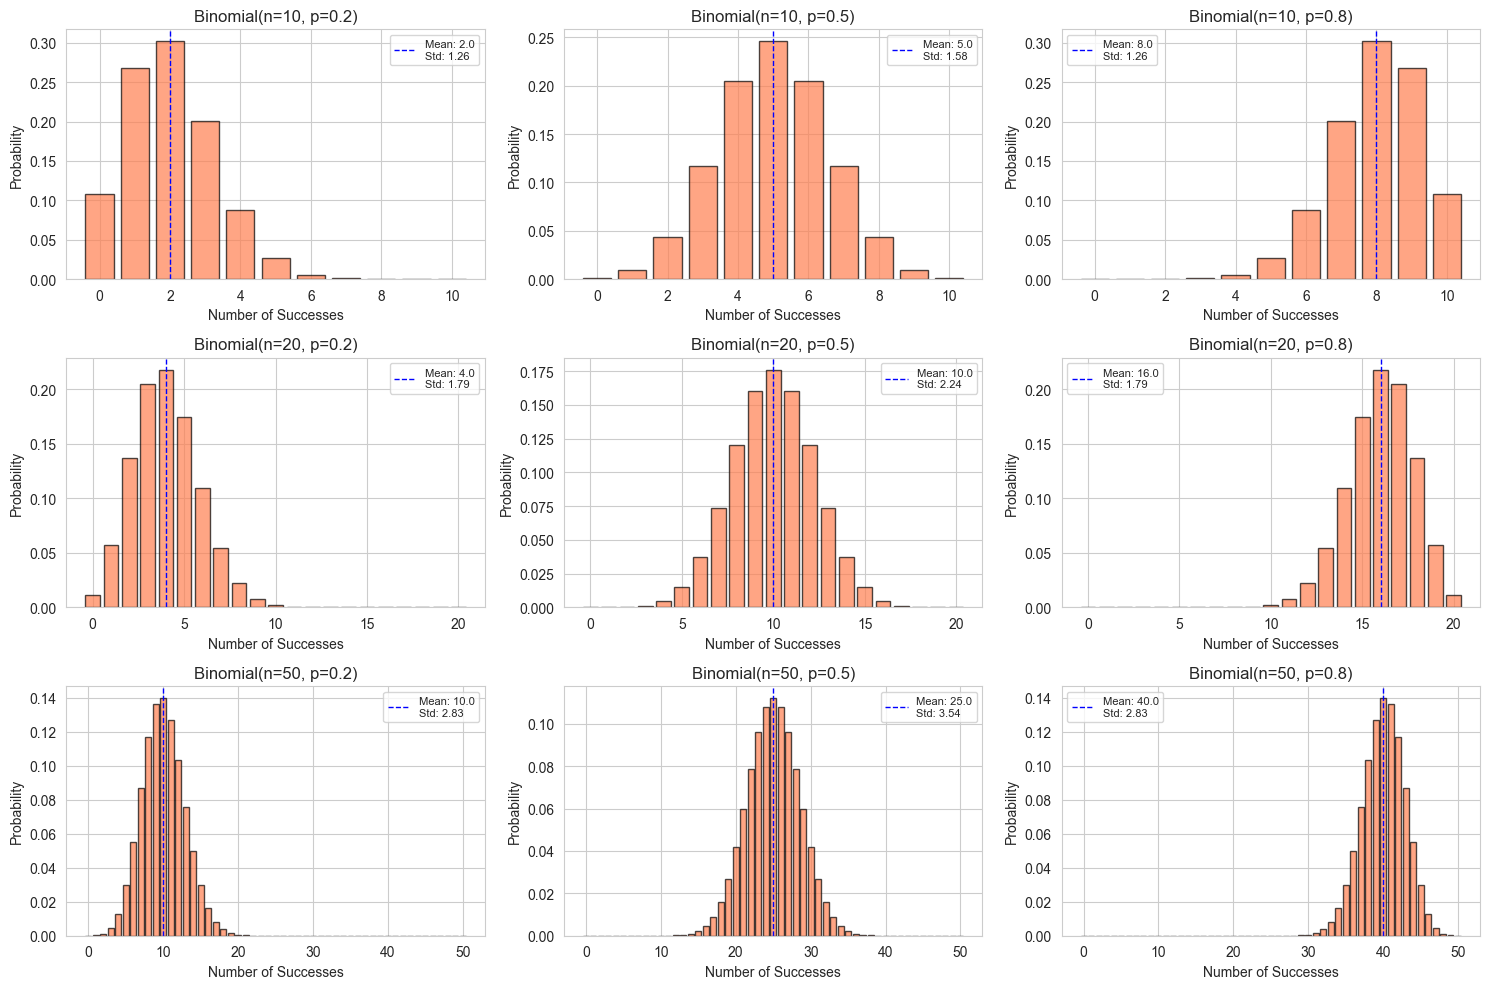

In [9]:
# Generate binomial distributions with different parameters
n_trials = [10, 20, 50]
p_success = [0.2, 0.5, 0.8]

plt.figure(figsize=(15, 10))
plot_idx = 1

for n in n_trials:
    for p in p_success:
        # Create the distribution
        x = np.arange(0, n+1)
        binomial = stats.binom.pmf(x, n, p)
        
        # Calculate mean and variance
        mean = n * p
        variance = n * p * (1-p)
        std_dev = np.sqrt(variance)
        
        # Plot
        plt.subplot(3, 3, plot_idx)
        plt.bar(x, binomial, alpha=0.7, color='coral', edgecolor='black')
        plt.axvline(mean, color='blue', linestyle='dashed', linewidth=1, 
                   label=f'Mean: {mean:.1f}\nStd: {std_dev:.2f}')
        plt.title(f'Binomial(n={n}, p={p})')
        plt.xlabel('Number of Successes')
        plt.ylabel('Probability')
        plt.legend(fontsize=8)
        
        plot_idx += 1

plt.tight_layout()
plt.show()

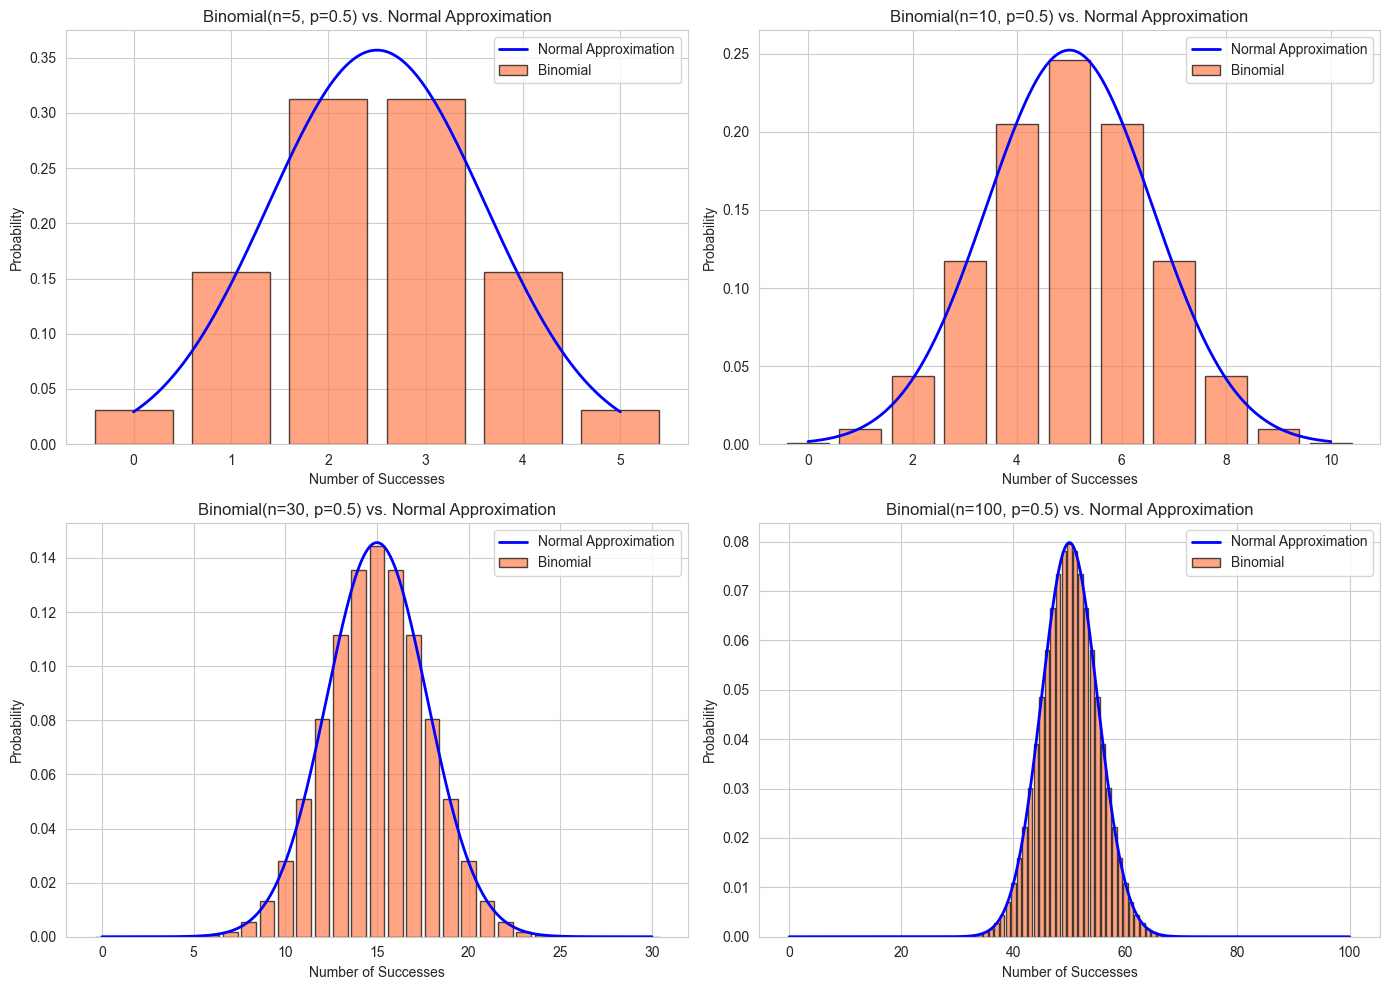

In [10]:
# Demonstrate how binomial approaches normal as n increases
p = 0.5  # Probability of success
n_values = [5, 10, 30, 100]

plt.figure(figsize=(14, 10))

for i, n in enumerate(n_values):
    # Binomial distribution
    x = np.arange(0, n+1)
    binomial = stats.binom.pmf(x, n, p)
    
    # Corresponding normal approximation
    mu = n * p
    sigma = np.sqrt(n * p * (1-p))
    x_normal = np.linspace(0, n, 1000)
    normal = stats.norm.pdf(x_normal, mu, sigma)
    
    # Scale normal distribution for comparison (area under PMF = 1)
    normal_scaled = normal * (x[1] - x[0])
    
    plt.subplot(2, 2, i+1)
    plt.bar(x, binomial, alpha=0.7, color='coral', edgecolor='black', label='Binomial')
    plt.plot(x_normal, normal_scaled, 'b-', linewidth=2, label='Normal Approximation')
    plt.title(f'Binomial(n={n}, p={p}) vs. Normal Approximation')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()

## Poisson Distribution

The Poisson distribution models the number of events occurring in a fixed time interval, knowing the average rate of occurrence. It's characterized by a single parameter:
- λ (lambda): the average number of events per interval

Key properties:
- Mean = λ
- Variance = λ
- Discrete distribution (outcomes are non-negative integers)
- Used for modeling rare events or counts
- Good for modeling events that occur independently at a constant average rate

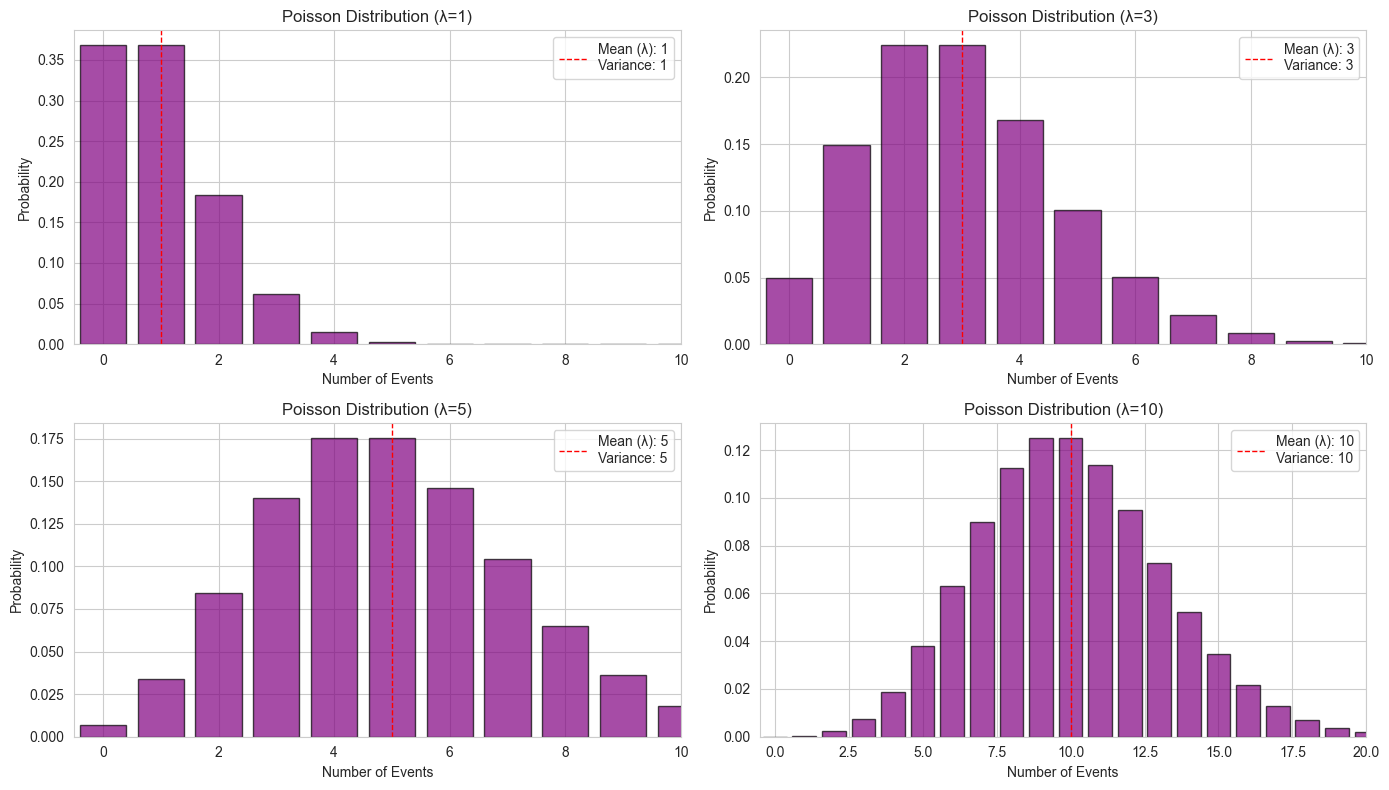

In [11]:
# Generate Poisson distributions with different lambda values
lambda_values = [1, 3, 5, 10]

plt.figure(figsize=(14, 8))

for i, lambda_val in enumerate(lambda_values):
    # Range for x values (extend to where probability becomes negligible)
    x = np.arange(0, max(20, lambda_val*3))
    
    # Calculate Poisson PMF
    poisson = stats.poisson.pmf(x, lambda_val)
    
    plt.subplot(2, 2, i+1)
    plt.bar(x, poisson, alpha=0.7, color='purple', edgecolor='black')
    plt.axvline(lambda_val, color='red', linestyle='dashed', linewidth=1, 
               label=f'Mean (λ): {lambda_val}\nVariance: {lambda_val}')
    plt.title(f'Poisson Distribution (λ={lambda_val})')
    plt.xlabel('Number of Events')
    plt.ylabel('Probability')
    plt.legend()
    
    # Set x-axis limit based on lambda (extend a bit beyond where probability becomes negligible)
    plt.xlim(-0.5, max(10, lambda_val*2))

plt.tight_layout()
plt.show()

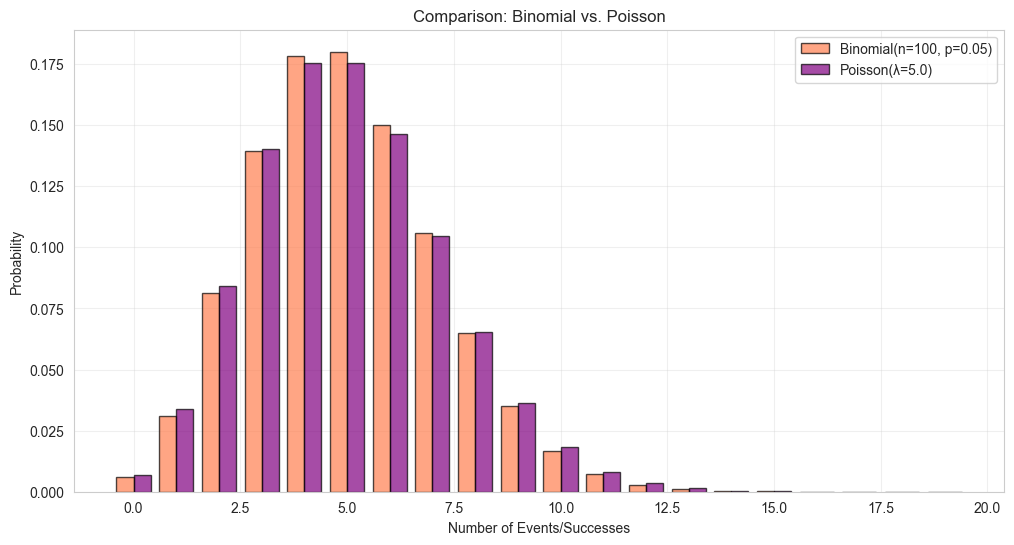

Mean Absolute Difference between distributions: 0.0012598332


In [12]:
# Compare Binomial and Poisson distributions
# For large n and small p, Binomial(n,p) ≈ Poisson(λ) where λ = n*p

# Parameters
n = 100  # Number of trials
p = 0.05  # Probability of success
lambda_val = n * p  # Should equal 5

# Generate distributions
x_range = np.arange(0, 20)
binomial = stats.binom.pmf(x_range, n, p)
poisson = stats.poisson.pmf(x_range, lambda_val)

# Plot both distributions
plt.figure(figsize=(12, 6))
plt.bar(x_range-0.2, binomial, width=0.4, alpha=0.7, color='coral', edgecolor='black', label=f'Binomial(n={n}, p={p})')
plt.bar(x_range+0.2, poisson, width=0.4, alpha=0.7, color='purple', edgecolor='black', label=f'Poisson(λ={lambda_val})')
plt.title('Comparison: Binomial vs. Poisson')
plt.xlabel('Number of Events/Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Calculate Mean Absolute Difference to quantify similarity
mad = np.mean(np.abs(binomial - poisson))
print(f"Mean Absolute Difference between distributions: {mad:.10f}")

## Skewed Distributions

While normal distributions are symmetric, many real-world distributions are skewed, with a longer tail on one side. Common skewed distributions include:

1. **Positively Skewed (Right-Skewed)**: Long tail on right side, mean > median
   - Examples: Income distributions, housing prices, response times

2. **Negatively Skewed (Left-Skewed)**: Long tail on left side, mean < median
   - Examples: Age of death, exam scores with ceiling effects

Let's explore some common skewed distributions:

In [13]:
# Generate different skewed distributions
np.random.seed(42)

# Lognormal distribution (always positively skewed)
lognormal_data = np.random.lognormal(mean=0, sigma=1, size=1000)

# Exponential distribution (always positively skewed)
exponential_data = np.random.exponential(scale=1, size=1000)

# Beta distribution (can be skewed in either direction)
beta_right_skewed = np.random.beta(a=2, b=5, size=1000)  # Right-skewed
beta_left_skewed = np.random.beta(a=5, b=2, size=1000)   # Left-skewed

# Calculate statistics
def get_stats(data, name):
    mean_val = np.mean(data)
    median_val = np.median(data)
    skewness = stats.skew(data)
    return {
        'Distribution': name,
        'Mean': mean_val,
        'Median': median_val,
        'Skewness': skewness,
        'Mean > Median': mean_val > median_val
    }

# Collect statistics for each distribution
dists = [
    get_stats(lognormal_data, 'Lognormal'),
    get_stats(exponential_data, 'Exponential'),
    get_stats(beta_right_skewed, 'Beta (Right-Skewed)'),
    get_stats(beta_left_skewed, 'Beta (Left-Skewed)')
]

# Display statistics
pd.DataFrame(dists).set_index('Distribution')

,Mean,Median,Skewness,Mean > Median
Distribution,,,,
Lognormal,1.682334,1.025624,8.298614,True
Exponential,1.007986,0.725931,1.980812,True
Beta (Right-Skewed),0.287748,0.266577,0.519026,True
Beta (Left-Skewed),0.709345,0.726418,-0.559194,False


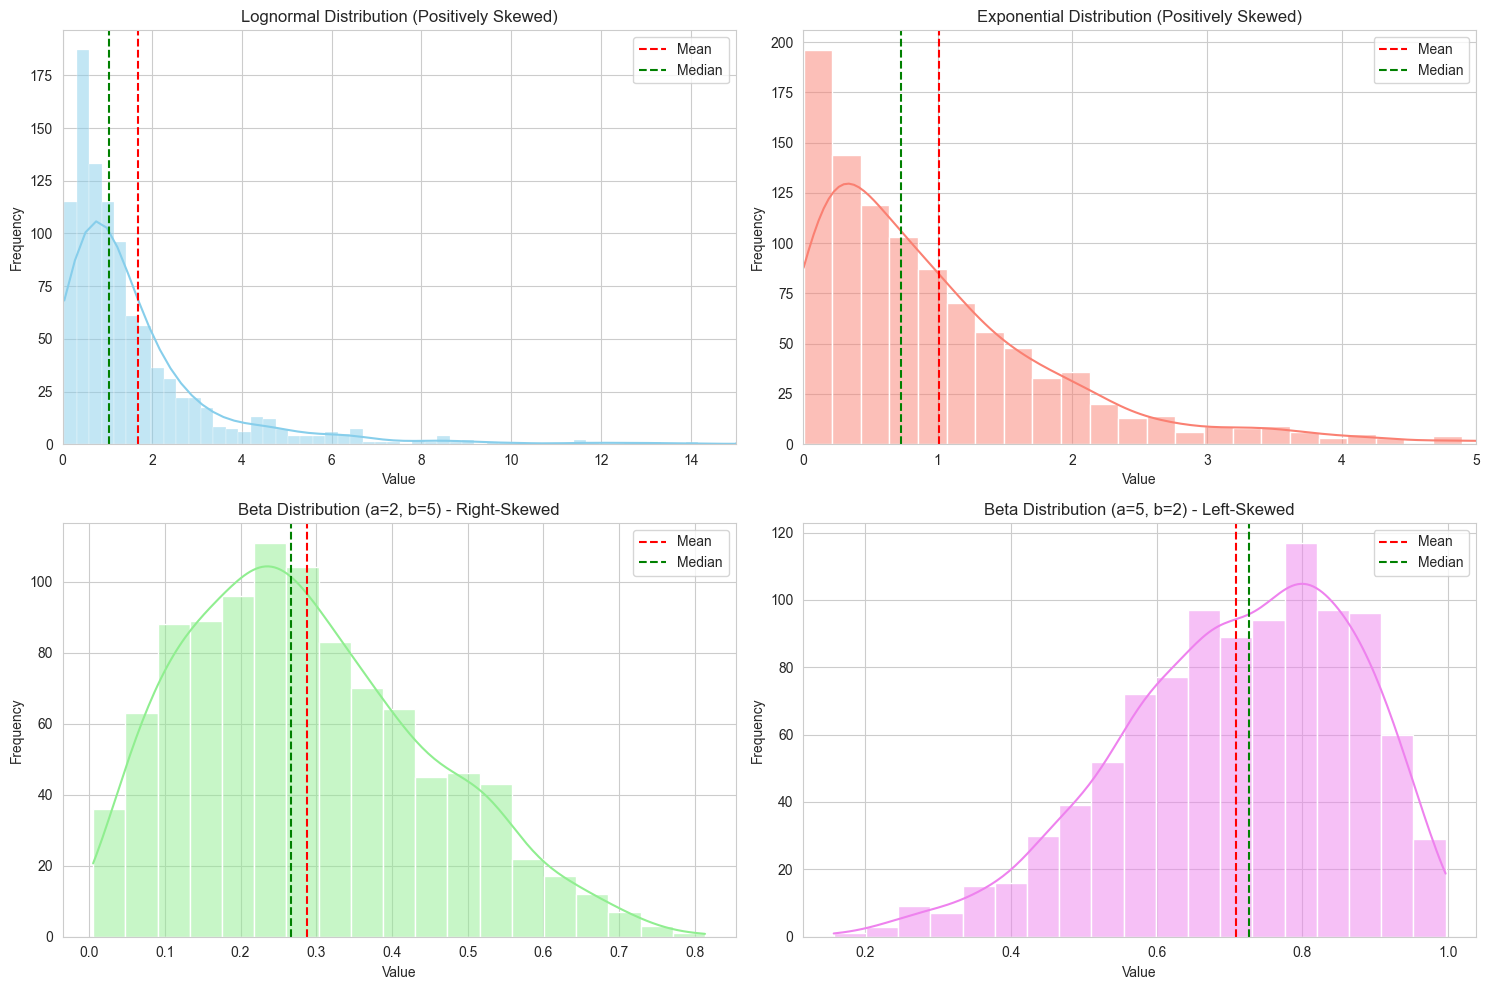

In [14]:
# Visualize skewed distributions
plt.figure(figsize=(15, 10))

# Lognormal
plt.subplot(2, 2, 1)
sns.histplot(lognormal_data, kde=True, color='skyblue')
plt.axvline(np.mean(lognormal_data), color='red', linestyle='dashed', label='Mean')
plt.axvline(np.median(lognormal_data), color='green', linestyle='dashed', label='Median')
plt.title('Lognormal Distribution (Positively Skewed)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 15)  # Limit x-axis for better visualization

# Exponential
plt.subplot(2, 2, 2)
sns.histplot(exponential_data, kde=True, color='salmon')
plt.axvline(np.mean(exponential_data), color='red', linestyle='dashed', label='Mean')
plt.axvline(np.median(exponential_data), color='green', linestyle='dashed', label='Median')
plt.title('Exponential Distribution (Positively Skewed)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 5)  # Limit x-axis for better visualization

# Beta (Right-Skewed)
plt.subplot(2, 2, 3)
sns.histplot(beta_right_skewed, kde=True, color='lightgreen')
plt.axvline(np.mean(beta_right_skewed), color='red', linestyle='dashed', label='Mean')
plt.axvline(np.median(beta_right_skewed), color='green', linestyle='dashed', label='Median')
plt.title('Beta Distribution (a=2, b=5) - Right-Skewed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Beta (Left-Skewed)
plt.subplot(2, 2, 4)
sns.histplot(beta_left_skewed, kde=True, color='violet')
plt.axvline(np.mean(beta_left_skewed), color='red', linestyle='dashed', label='Mean')
plt.axvline(np.median(beta_left_skewed), color='green', linestyle='dashed', label='Median')
plt.title('Beta Distribution (a=5, b=2) - Left-Skewed')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Visualizing Distributions

There are many ways to visualize distributions, each with advantages for different aspects of the data. Let's explore the main visualization techniques:

1. **Histograms**: Show frequency distribution by binning data
2. **Density Plots**: Smooth version of histograms showing the probability density
3. **Box Plots**: Show median, quartiles, and outliers
4. **Violin Plots**: Combine box plot with density plots
5. **Q-Q Plots**: Check if data follows a specific theoretical distribution
6. **ECDF (Empirical Cumulative Distribution Function)**: Show the proportion of data below each value

In [15]:
# Generate multiple datasets with different distributions
np.random.seed(42)
n_points = 500

normal_data = np.random.normal(loc=0, scale=1, size=n_points)
skewed_data = np.random.lognormal(mean=0, sigma=0.6, size=n_points)
bimodal_data = np.concatenate([
    np.random.normal(loc=-2, scale=0.5, size=n_points//2),
    np.random.normal(loc=2, scale=0.5, size=n_points//2)
])
uniform_data = np.random.uniform(-3, 3, size=n_points)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Normal': normal_data,
    'Skewed (Lognormal)': skewed_data,
    'Bimodal': bimodal_data,
    'Uniform': uniform_data
})

# Create a long-format DataFrame for some plots
df_long = pd.melt(df, var_name='Distribution', value_name='Value')

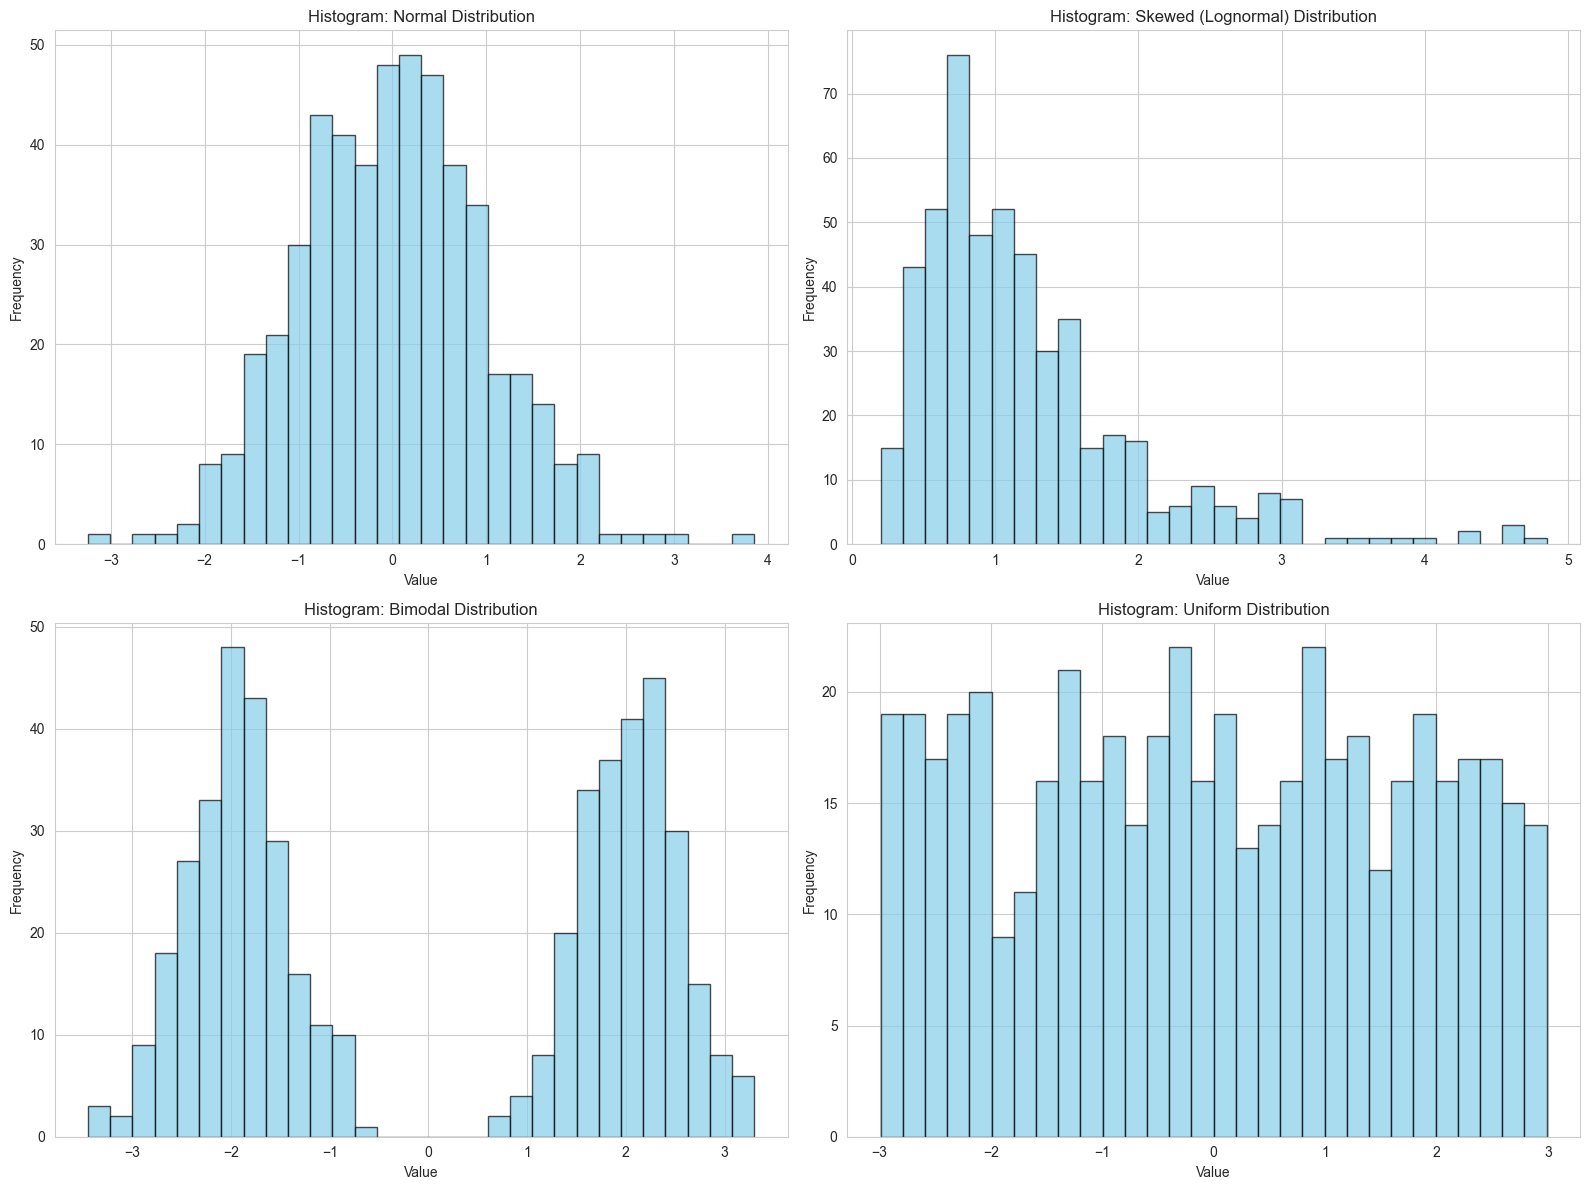

In [16]:
# 1. Histograms
plt.figure(figsize=(16, 12))

for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Histogram: {col} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

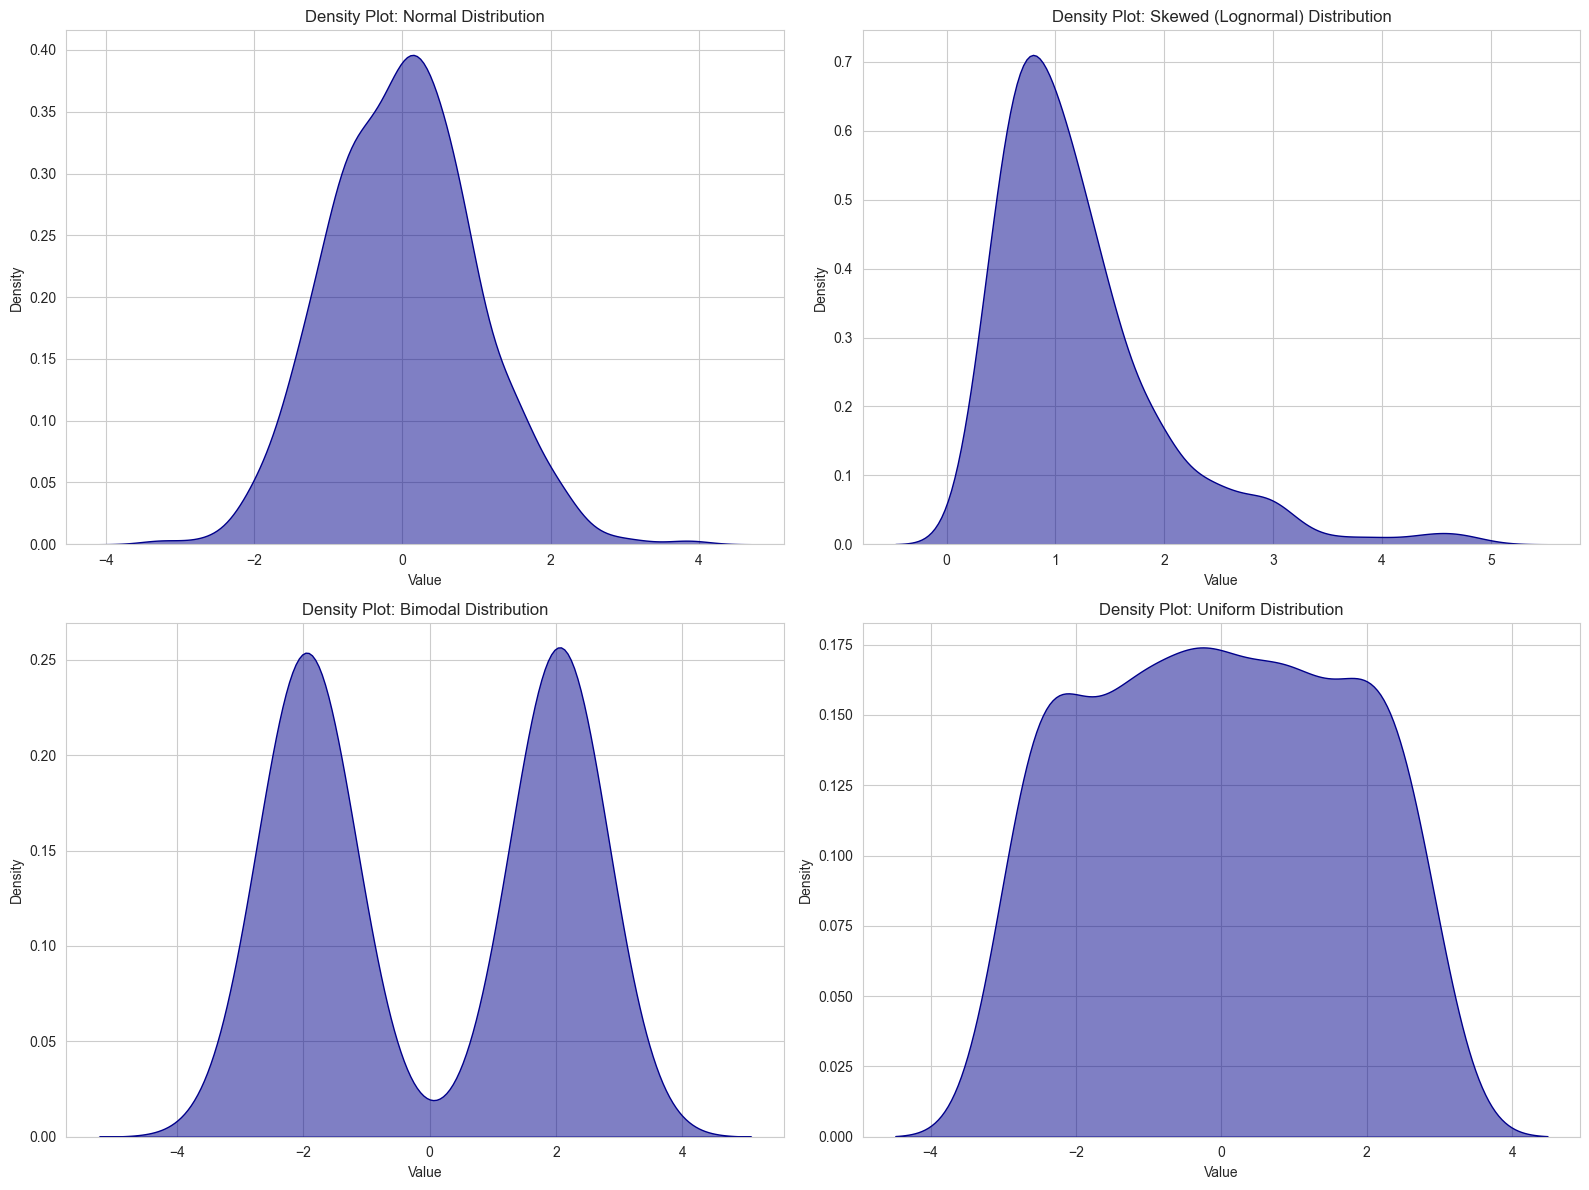

In [17]:
# 2. Density Plots (KDE)
plt.figure(figsize=(16, 12))

for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df[col], fill=True, color='darkblue', alpha=0.5)
    plt.title(f'Density Plot: {col} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

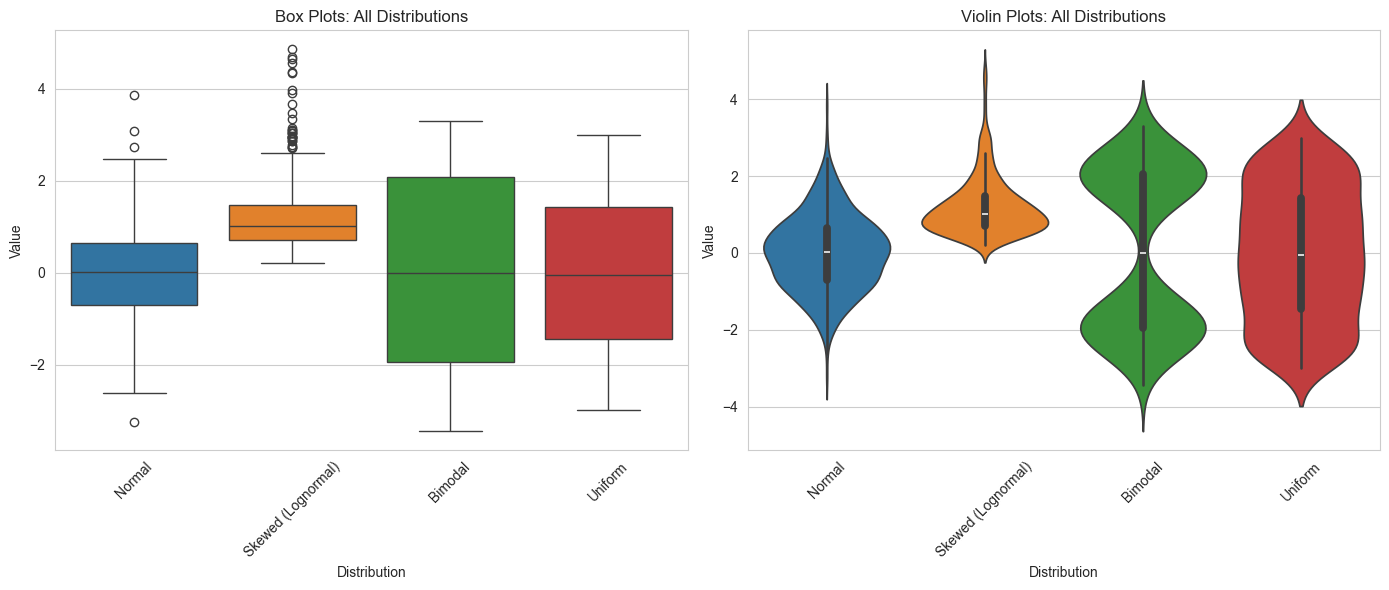

In [18]:
# 3. Box Plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title('Box Plots: All Distributions')
plt.xlabel('Distribution')
plt.ylabel('Value')
plt.xticks(rotation=45)

# 4. Violin Plots
plt.subplot(1, 2, 2)
sns.violinplot(data=df)
plt.title('Violin Plots: All Distributions')
plt.xlabel('Distribution')
plt.ylabel('Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

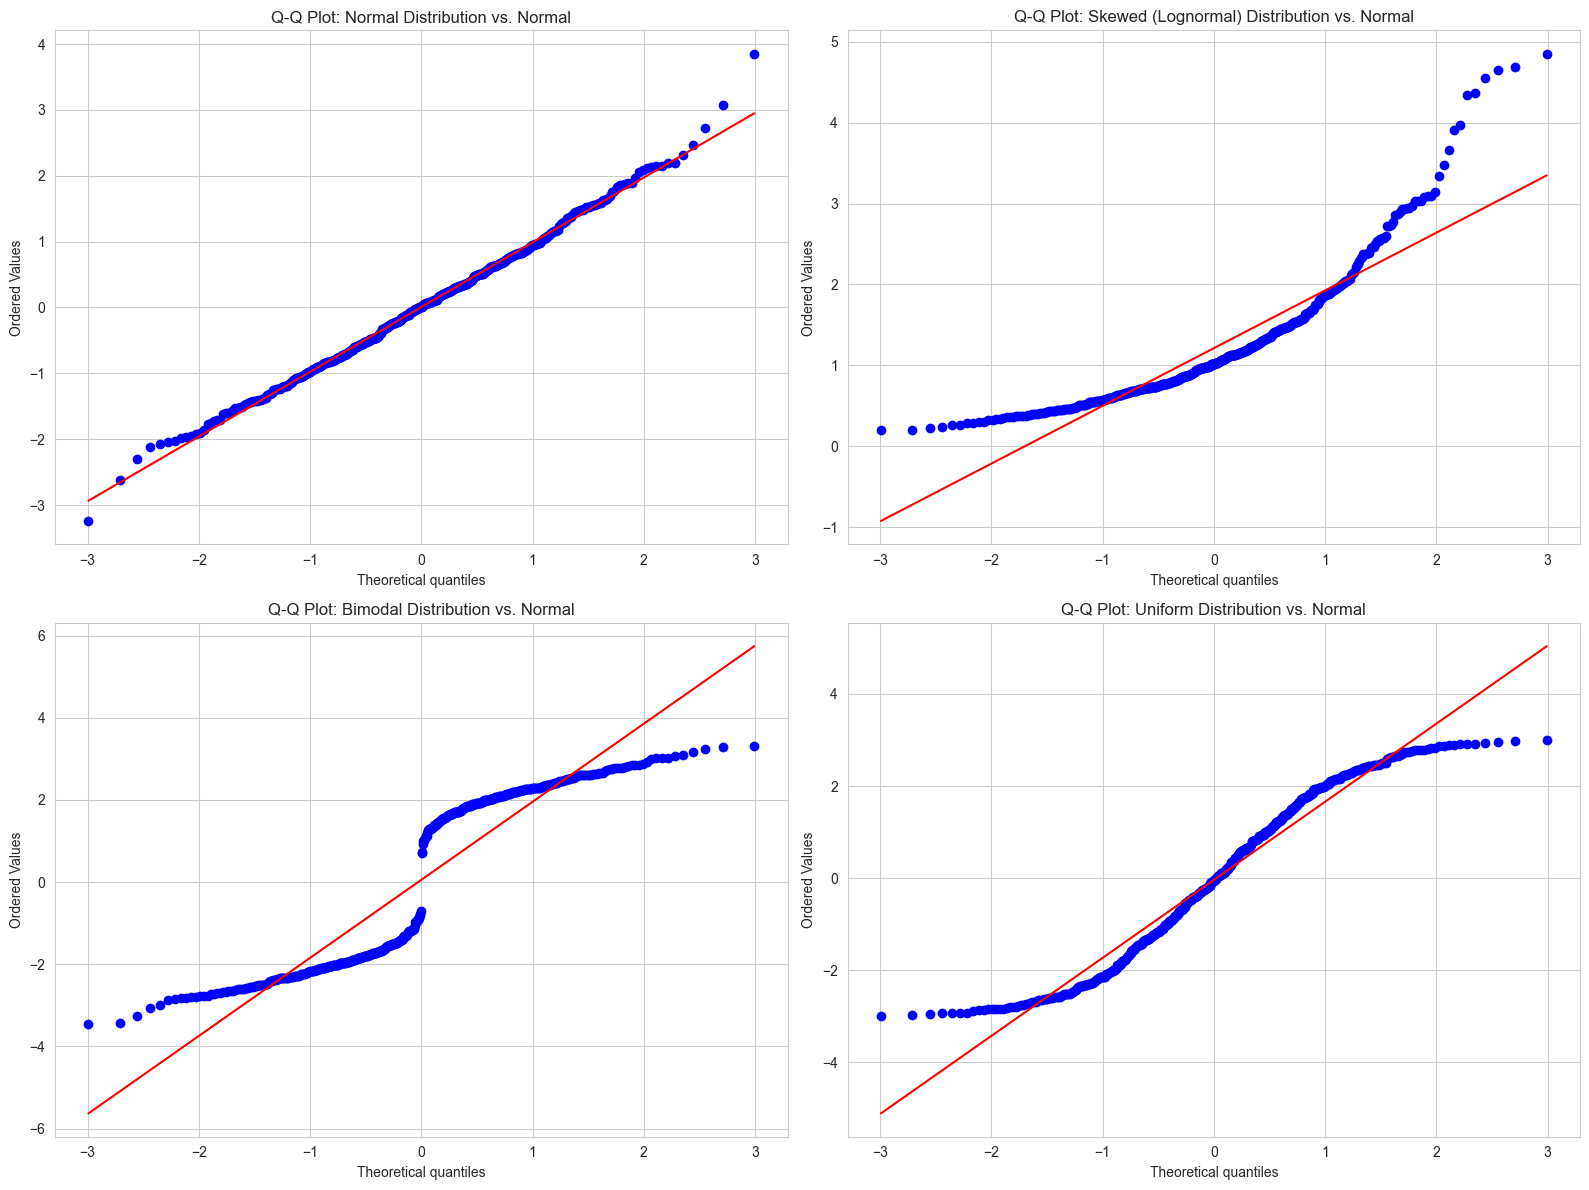

In [19]:
# 5. Q-Q Plots (to check for normality)
plt.figure(figsize=(16, 12))

for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col} Distribution vs. Normal')

plt.tight_layout()
plt.show()

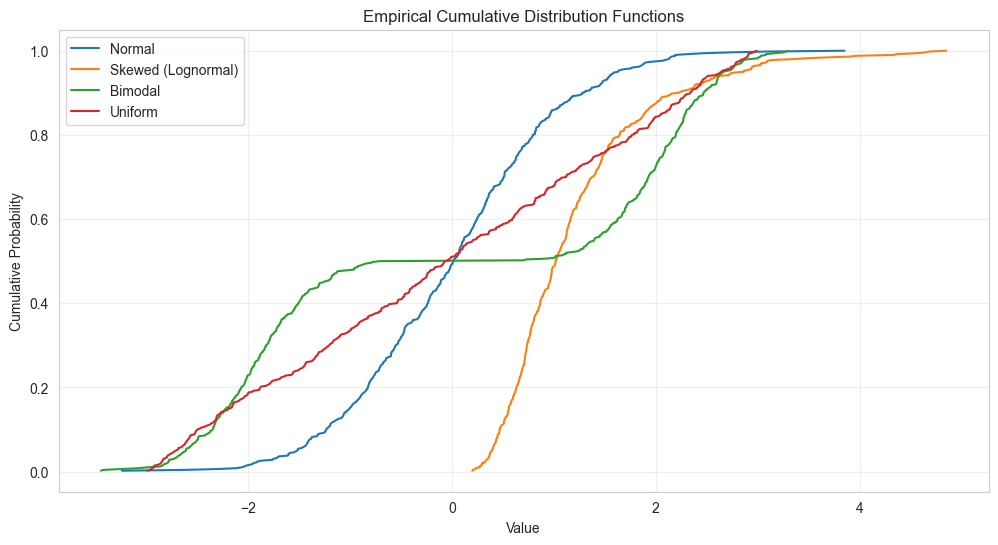

In [20]:
# 6. Empirical Cumulative Distribution Function (ECDF)
plt.figure(figsize=(12, 6))

for col in df.columns:
    # Sort the data
    x = np.sort(df[col])
    # Calculate cumulative probabilities
    y = np.arange(1, len(x) + 1) / len(x)
    # Plot ECDF
    plt.plot(x, y, label=col)

plt.title('Empirical Cumulative Distribution Functions')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Density Estimation Techniques

Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Unlike a histogram, which places data into discrete bins, KDE produces a smooth curve by placing a kernel (typically a Gaussian) at each data point and then summing these kernels.

Key parameters for KDE:
1. **Bandwidth**: Controls the smoothness of the estimate (similar to bin width in histograms)
2. **Kernel**: The shape of the function placed at each data point (Gaussian is common)

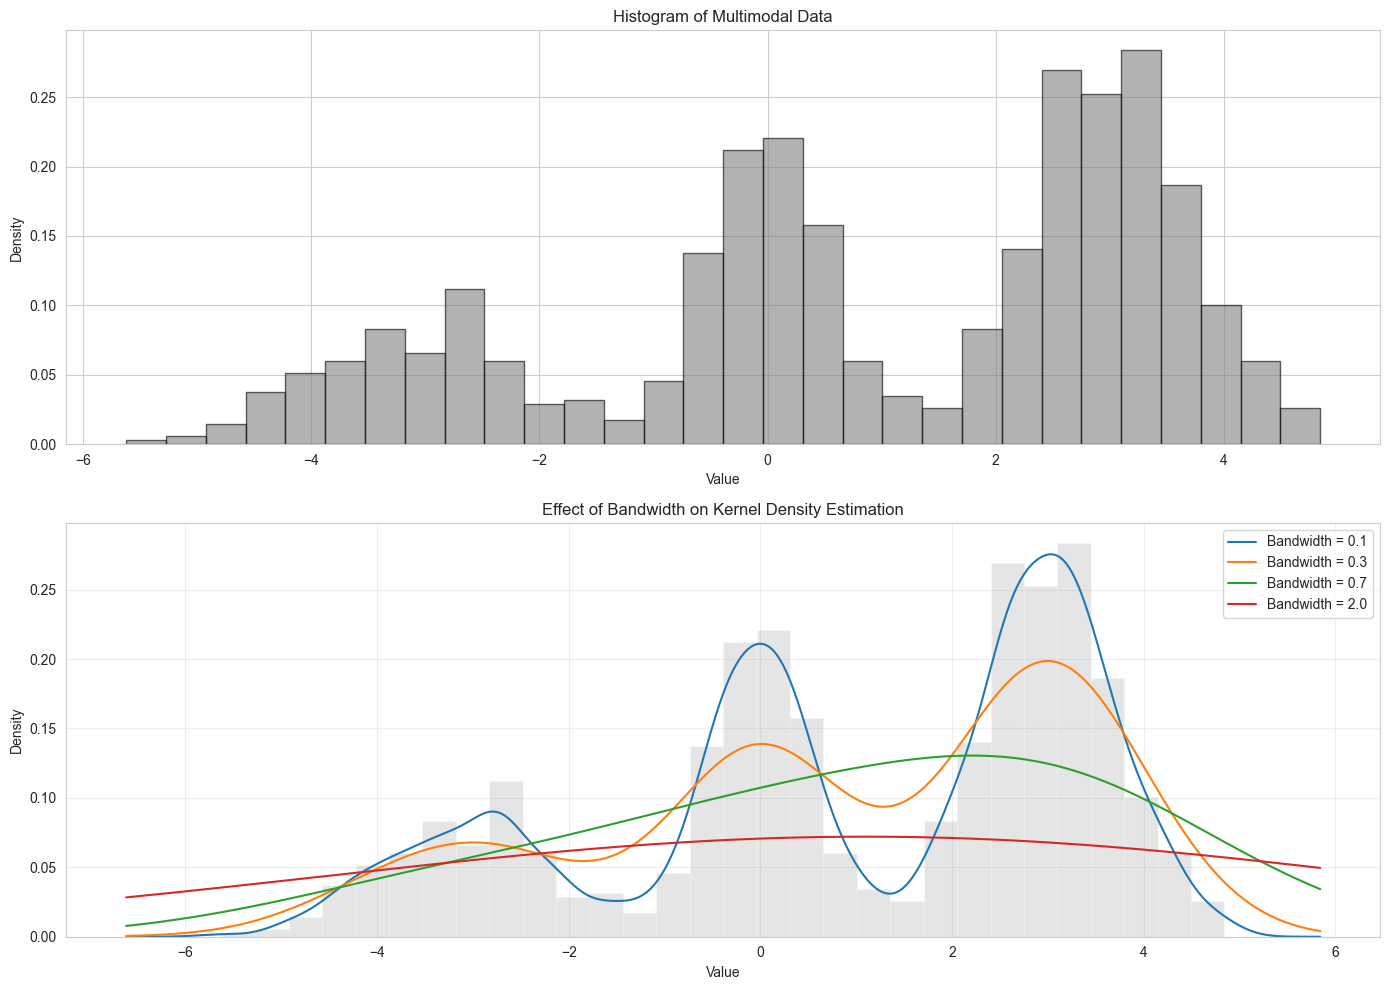

In [21]:
# Generate a sample dataset
np.random.seed(42)
data = np.concatenate([
    np.random.normal(-3, 1, 200),    # First mode
    np.random.normal(0, 0.5, 300),   # Second mode
    np.random.normal(3, 0.7, 500)    # Third mode
])

# Plot histogram
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray', edgecolor='black')
plt.title('Histogram of Multimodal Data')
plt.xlabel('Value')
plt.ylabel('Density')

# Compare different bandwidths for KDE
plt.subplot(2, 1, 2)
for bandwidth in [0.1, 0.3, 0.7, 2.0]:
    kde = stats.gaussian_kde(data, bw_method=bandwidth)
    x = np.linspace(min(data)-1, max(data)+1, 1000)
    plt.plot(x, kde(x), label=f'Bandwidth = {bandwidth}')

plt.hist(data, bins=30, density=True, alpha=0.2, color='gray', edgecolor=None)
plt.title('Effect of Bandwidth on Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

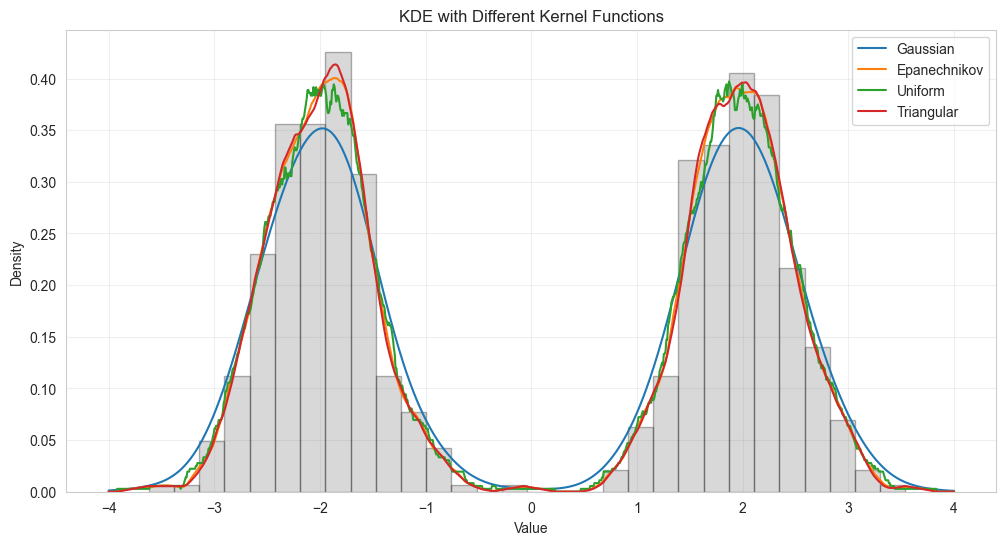

In [22]:
# Compare different kernel functions
np.random.seed(42)
# Generate bimodal data
data = np.concatenate([
    np.random.normal(-2, 0.5, 300),
    np.random.normal(2, 0.5, 300)
])

# Define custom KDE function for different kernels
def kde_custom(x, data, kernel, h):
    """
    Custom KDE function to demonstrate different kernels
    x: points to evaluate the density
    data: the data points
    kernel: the kernel function
    h: bandwidth
    """
    n = len(data)
    return np.sum([kernel((x - xi) / h) for xi in data]) / (n * h)

# Define kernel functions
def gaussian_kernel(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

def epanechnikov_kernel(x):
    return np.where(np.abs(x) <= 1, 3/4 * (1 - x**2), 0)

def uniform_kernel(x):
    return np.where(np.abs(x) <= 1, 0.5, 0)

def triangular_kernel(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

# Evaluation points
x_eval = np.linspace(-4, 4, 1000)
bandwidth = 0.3

# Calculate density estimates for each kernel
densities = {}
for kernel_name, kernel_func in [
    ('Gaussian', gaussian_kernel),
    ('Epanechnikov', epanechnikov_kernel),
    ('Uniform', uniform_kernel),
    ('Triangular', triangular_kernel)
]:
    densities[kernel_name] = np.array([kde_custom(x, data, kernel_func, bandwidth) for x in x_eval])

# Plot results
plt.figure(figsize=(12, 6))
plt.hist(data, bins=30, density=True, alpha=0.3, color='gray', edgecolor='black')

for kernel_name, density in densities.items():
    plt.plot(x_eval, density, label=kernel_name)

plt.title('KDE with Different Kernel Functions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Testing Distribution Fit

Testing whether data follows a specific distribution is important for:
- Validating assumptions for parametric statistical tests
- Determining appropriate modeling approaches
- Understanding the underlying data generation process

Common tests include:
1. **Kolmogorov-Smirnov (K-S) test**: Compares empirical CDF with theoretical CDF
2. **Anderson-Darling test**: More sensitive to tails than K-S
3. **Shapiro-Wilk test**: Tests specifically for normality
4. **Chi-squared goodness of fit**: Uses binned data to compare observed and expected frequencies

In [23]:
# Generate datasets from different distributions
np.random.seed(42)
n_samples = 500

# Generate datasets
normal_data = np.random.normal(0, 1, n_samples)
uniform_data = np.random.uniform(-3, 3, n_samples)
skewed_data = np.random.lognormal(0, 0.5, n_samples)

# Create a function to run multiple distribution tests
def test_distribution(data, dist_name):
    results = {}
    
    # Test for normality
    ks_normal = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    sw_normal = stats.shapiro(data)
    ad_normal = stats.anderson(data, 'norm')
    
    # Test for uniformity (if applicable, assuming data range is known)
    if dist_name in ['uniform', 'normal']:
        # For demonstration, we'll use the min and max of the data
        ks_uniform = stats.kstest(data, 'uniform', args=(min(data), max(data) - min(data)))
    else:
        ks_uniform = (None, None)
    
    # Store results
    results['Distribution'] = dist_name
    results['KS Test (Normal) p-value'] = ks_normal.pvalue
    results['Shapiro-Wilk p-value'] = sw_normal.pvalue
    results['Anderson-Darling (Normal) Statistic'] = ad_normal.statistic
    results['Anderson-Darling Critical Values'] = ad_normal.critical_values
    results['Anderson-Darling Result'] = 'Reject normality' if ad_normal.statistic > ad_normal.critical_values[2] else 'Cannot reject normality'
    
    if dist_name in ['uniform', 'normal']:
        results['KS Test (Uniform) p-value'] = ks_uniform.pvalue
    
    return results

# Run tests on each dataset
test_results = [
    test_distribution(normal_data, 'normal'),
    test_distribution(uniform_data, 'uniform'),
    test_distribution(skewed_data, 'lognormal')
]

# Display results
pd.DataFrame(test_results).set_index('Distribution')

,KS Test (Normal) p-value,Shapiro-Wilk p-value,Anderson-Darling (Normal) Statistic,Anderson-Darling Critical Values,Anderson-Darling Result,KS Test (Uniform) p-value
Distribution,,,,,,
normal,0.840713,4.012691e-01,0.297780,"[0.571, 0.651, 0.781, 0.911, 1.083]",Cannot reject normality,2.104510e-32
uniform,0.002063,3.435170e-12,6.894300,"[0.571, 0.651, 0.781, 0.911, 1.083]",Reject normality,7.914536e-01
lognormal,0.000010,3.783035e-17,12.209371,"[0.571, 0.651, 0.781, 0.911, 1.083]",Reject normality,NaN


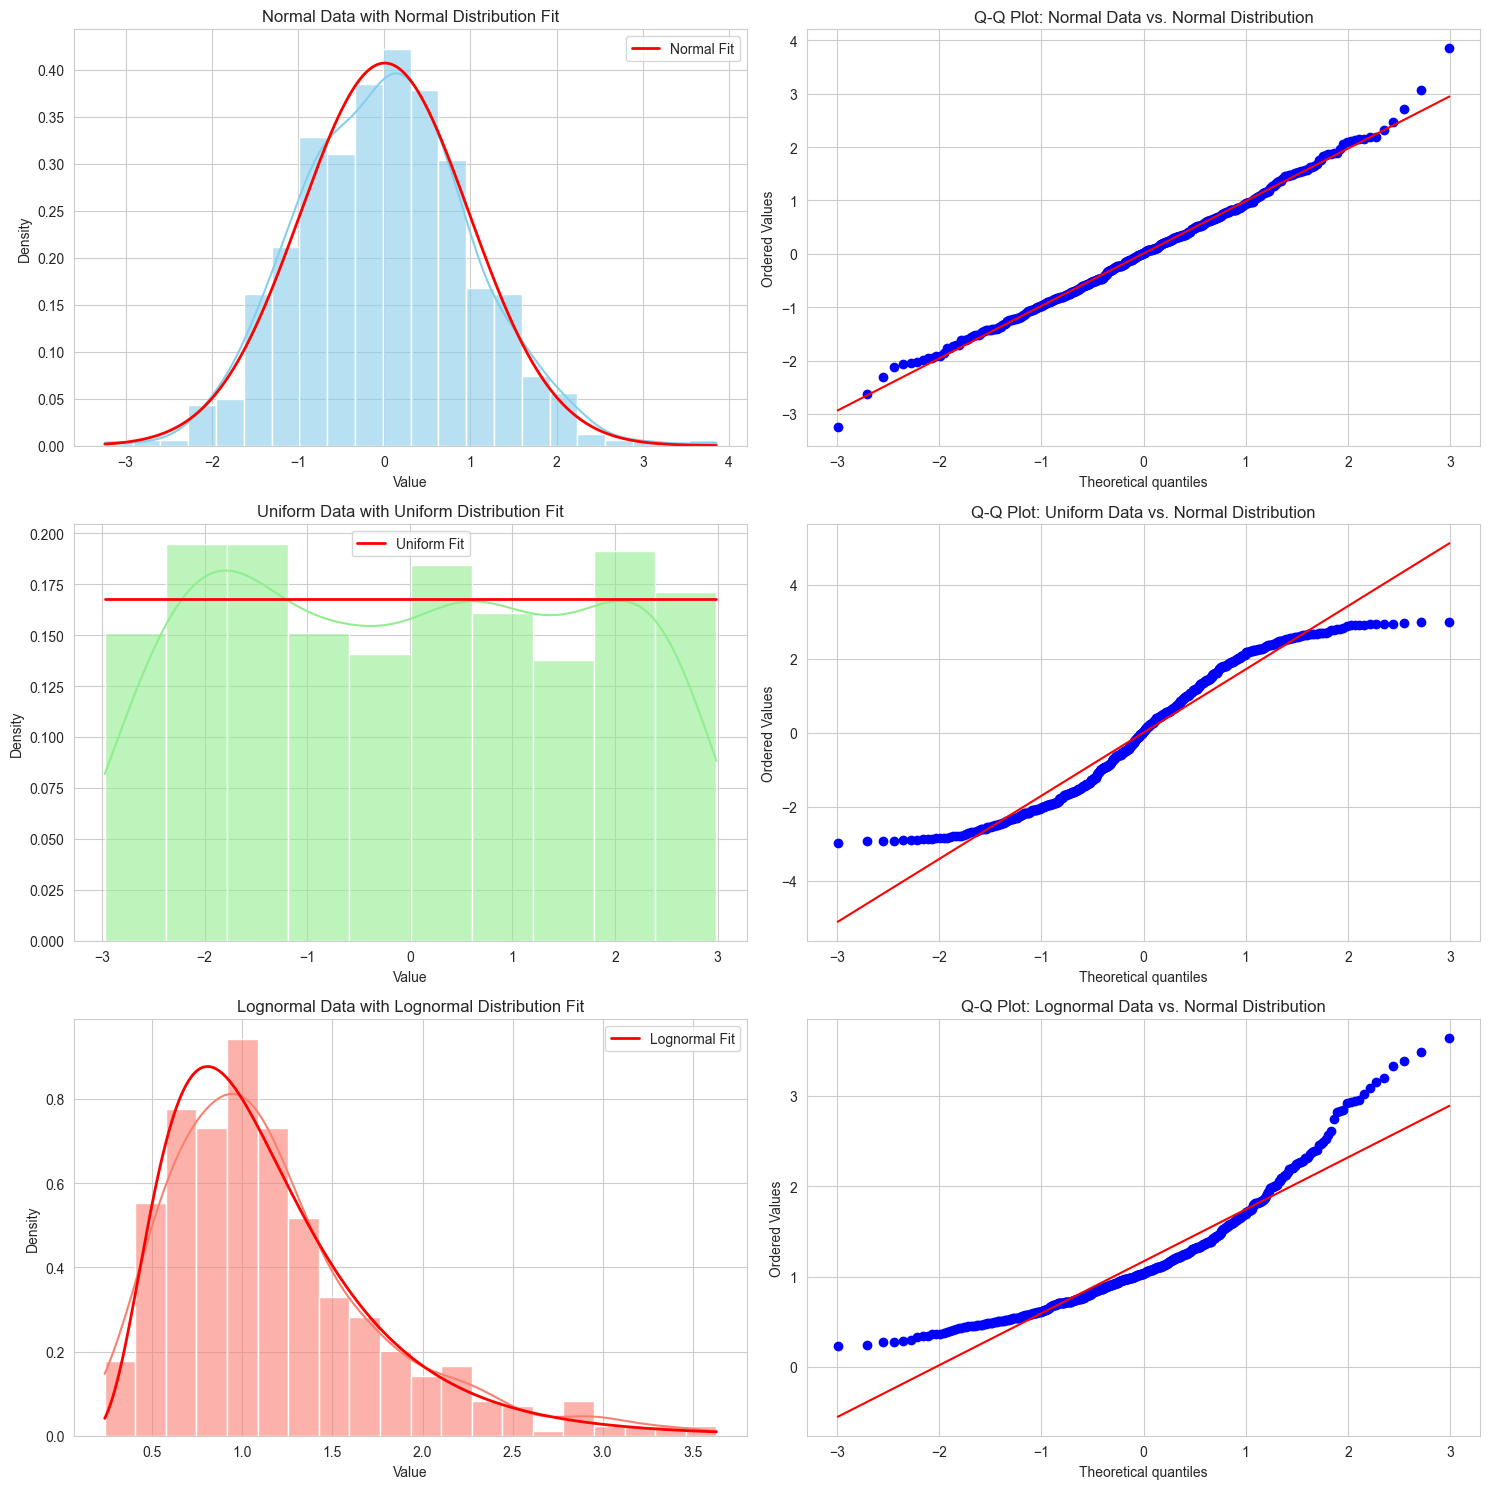

In [24]:
# Visualize the fit of distributions
plt.figure(figsize=(15, 15))

# 1. Normal data
plt.subplot(3, 2, 1)
sns.histplot(normal_data, kde=True, stat='density', alpha=0.6, color='skyblue')
x = np.linspace(min(normal_data), max(normal_data), 1000)
plt.plot(x, stats.norm.pdf(x, np.mean(normal_data), np.std(normal_data)), 
         'r-', linewidth=2, label='Normal Fit')
plt.title('Normal Data with Normal Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 2)
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Normal Data vs. Normal Distribution')

# 2. Uniform data
plt.subplot(3, 2, 3)
sns.histplot(uniform_data, kde=True, stat='density', alpha=0.6, color='lightgreen')
a, b = min(uniform_data), max(uniform_data)
x = np.linspace(a, b, 1000)
plt.plot(x, stats.uniform.pdf(x, a, b-a), 'r-', linewidth=2, label='Uniform Fit')
plt.title('Uniform Data with Uniform Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 4)
stats.probplot(uniform_data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Uniform Data vs. Normal Distribution')

# 3. Lognormal data
plt.subplot(3, 2, 5)
sns.histplot(skewed_data, kde=True, stat='density', alpha=0.6, color='salmon')
shape, loc, scale = stats.lognorm.fit(skewed_data, floc=0)
x = np.linspace(min(skewed_data), max(skewed_data), 1000)
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'r-', linewidth=2, label='Lognormal Fit')
plt.title('Lognormal Data with Lognormal Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.subplot(3, 2, 6)
stats.probplot(skewed_data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Lognormal Data vs. Normal Distribution')

plt.tight_layout()
plt.show()

## Real-world Data Distribution Analysis

Let's analyze some real-world datasets to identify their distributions, transform non-normal data if needed, and discuss implications for statistical analysis.

In [25]:
# Load or create sample datasets
from sklearn.datasets import fetch_california_housing, load_diabetes

# 1. California Housing dataset (real-world example)
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseValue'] = housing.target

# 2. Diabetes dataset (medical data example)
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['progression'] = diabetes.target

# Display the first few rows of each dataset
print("California Housing Dataset:")
print(housing_df.head())
print("\nDiabetes Dataset:")
print(diabetes_df.head())

California Housing Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  

Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.0

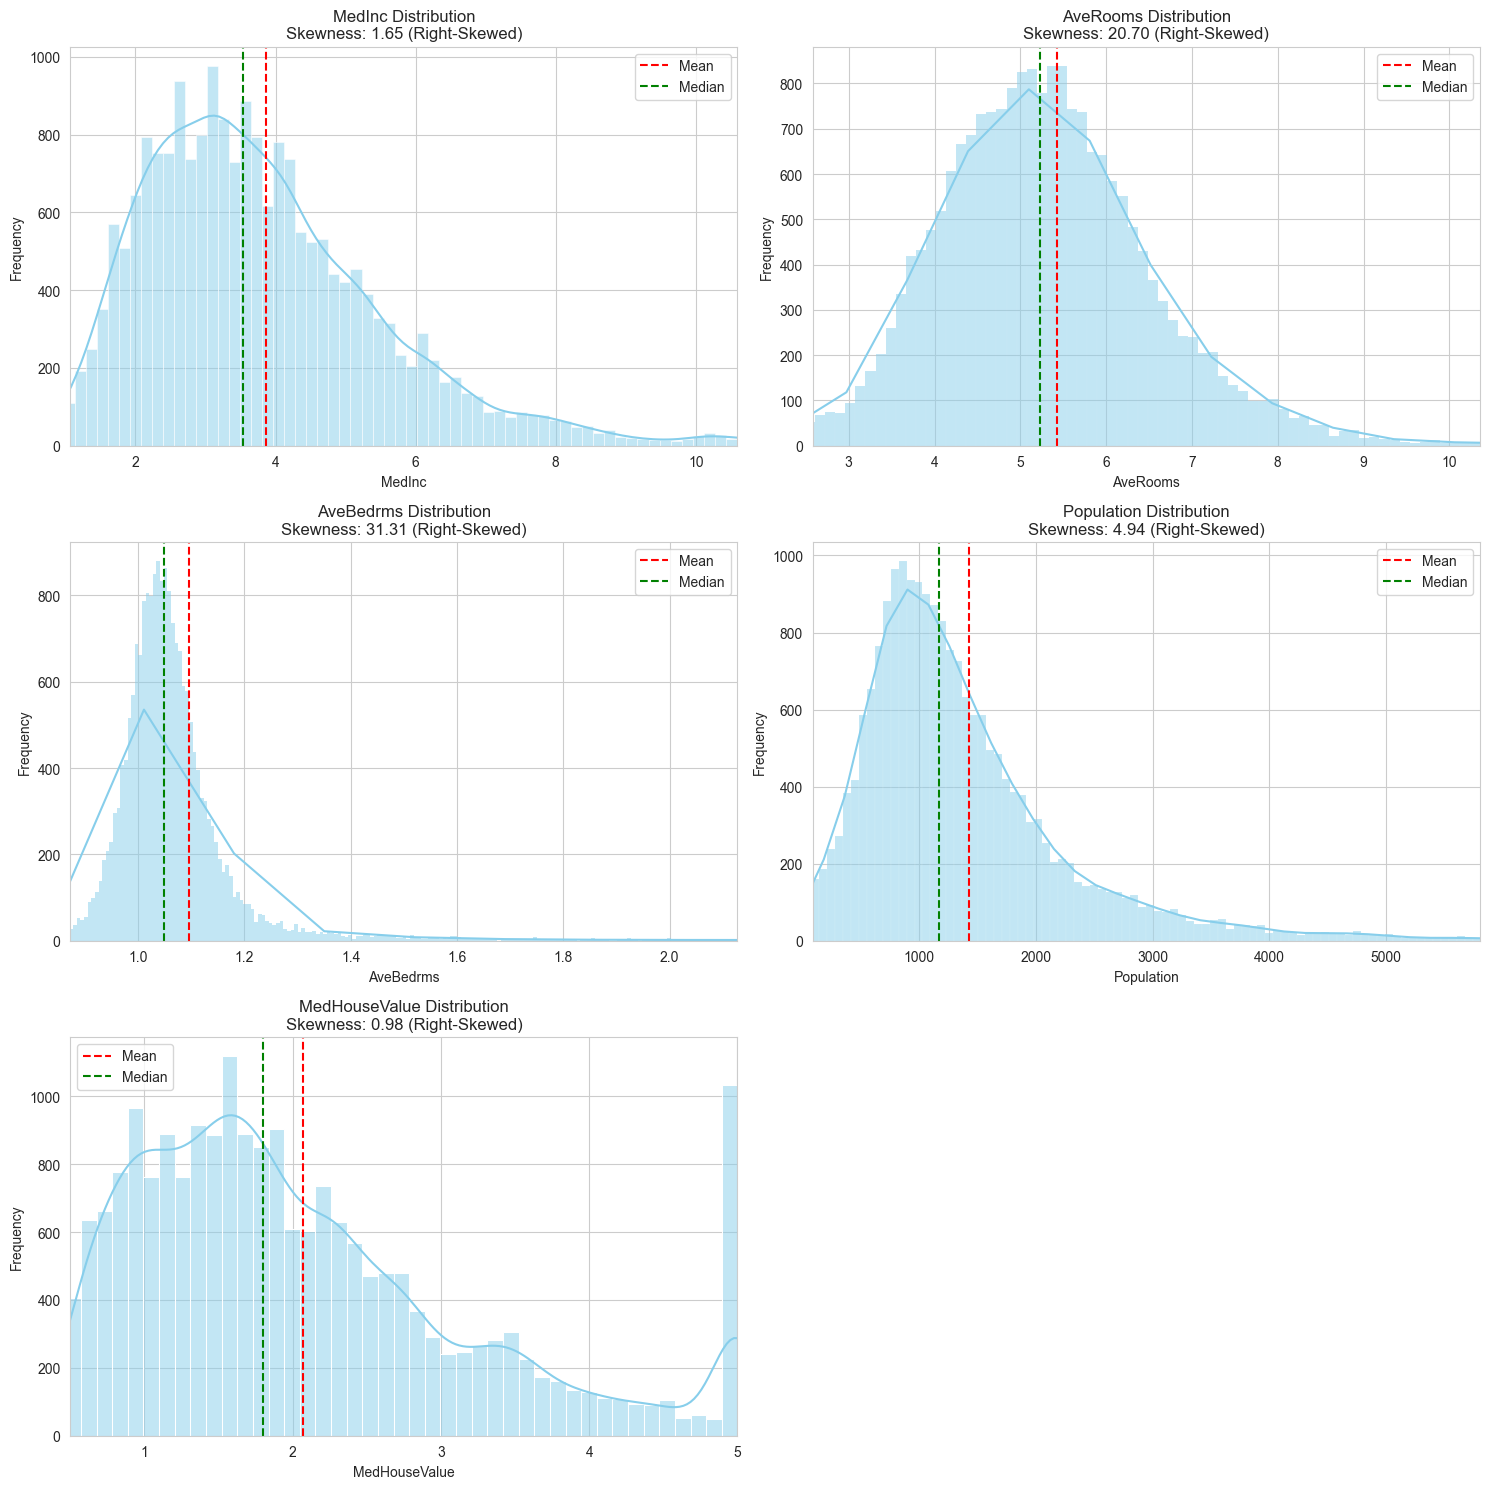

In [26]:
# Analyze distributions in the California Housing dataset
plt.figure(figsize=(15, 15))

# Select a subset of features to analyze
features_to_analyze = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'MedHouseValue']

for i, feature in enumerate(features_to_analyze):
    plt.subplot(3, 2, i+1)
    
    # Histogram with KDE
    sns.histplot(housing_df[feature], kde=True, color='skyblue')
    
    # Add vertical lines for mean and median
    plt.axvline(housing_df[feature].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(housing_df[feature].median(), color='green', linestyle='--', label='Median')
    
    # Add skewness information
    skewness = stats.skew(housing_df[feature])
    skew_type = "Right-Skewed" if skewness > 0 else "Left-Skewed" if skewness < 0 else "Symmetric"
    
    plt.title(f'{feature} Distribution\nSkewness: {skewness:.2f} ({skew_type})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Adjust x-axis limits to focus on main distribution (exclude extreme outliers)
    q1, q3 = np.percentile(housing_df[feature], [1, 99])
    plt.xlim(q1, q3)

plt.tight_layout()
plt.show()

In [27]:
# Test for normality in the housing dataset
normality_results = []

for feature in housing_df.columns:
    # Run normality tests
    shapiro_test = stats.shapiro(housing_df[feature])
    ks_test = stats.kstest(housing_df[feature], 'norm', 
                           args=(np.mean(housing_df[feature]), np.std(housing_df[feature])))
    
    # Calculate basic statistics
    mean_val = housing_df[feature].mean()
    median_val = housing_df[feature].median()
    skewness = stats.skew(housing_df[feature])
    kurtosis = stats.kurtosis(housing_df[feature])
    
    # Store results
    normality_results.append({
        'Feature': feature,
        'Mean': mean_val,
        'Median': median_val,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Shapiro p-value': shapiro_test.pvalue,
        'KS Test p-value': ks_test.pvalue,
        'Normal Distribution': 'Yes' if shapiro_test.pvalue > 0.05 else 'No'
    })

# Display results
pd.DataFrame(normality_results).set_index('Feature')

,Mean,Median,Skewness,Kurtosis,Shapiro p-value,KS Test p-value,Normal Distribution
Feature,,,,,,,
MedInc,3.870671,3.534800,1.646537,4.951034,6.560004e-79,4.518054e-144,No
HouseAge,28.639486,29.000000,0.060326,-0.800726,1.560223e-47,3.944664e-66,No
AveRooms,5.429000,5.229129,20.696365,879.139966,5.987885e-121,0.000000e+00,No
AveBedrms,1.096675,1.048780,31.314680,1636.315218,1.064266e-131,0.000000e+00,No
Population,1425.476744,1166.000000,4.935500,73.535009,1.744477e-102,0.000000e+00,No
AveOccup,3.070655,2.818116,97.632465,10648.430334,2.483029e-136,0.000000e+00,No
Latitude,35.631861,34.260000,0.465919,-1.117780,4.495161e-82,0.000000e+00,No
Longitude,-119.569704,-118.490000,-0.297780,-1.330121,4.121306e-78,0.000000e+00,No
MedHouseValue,2.068558,1.797000,0.977692,0.327500,1.367302e-74,4.743893e-191,No


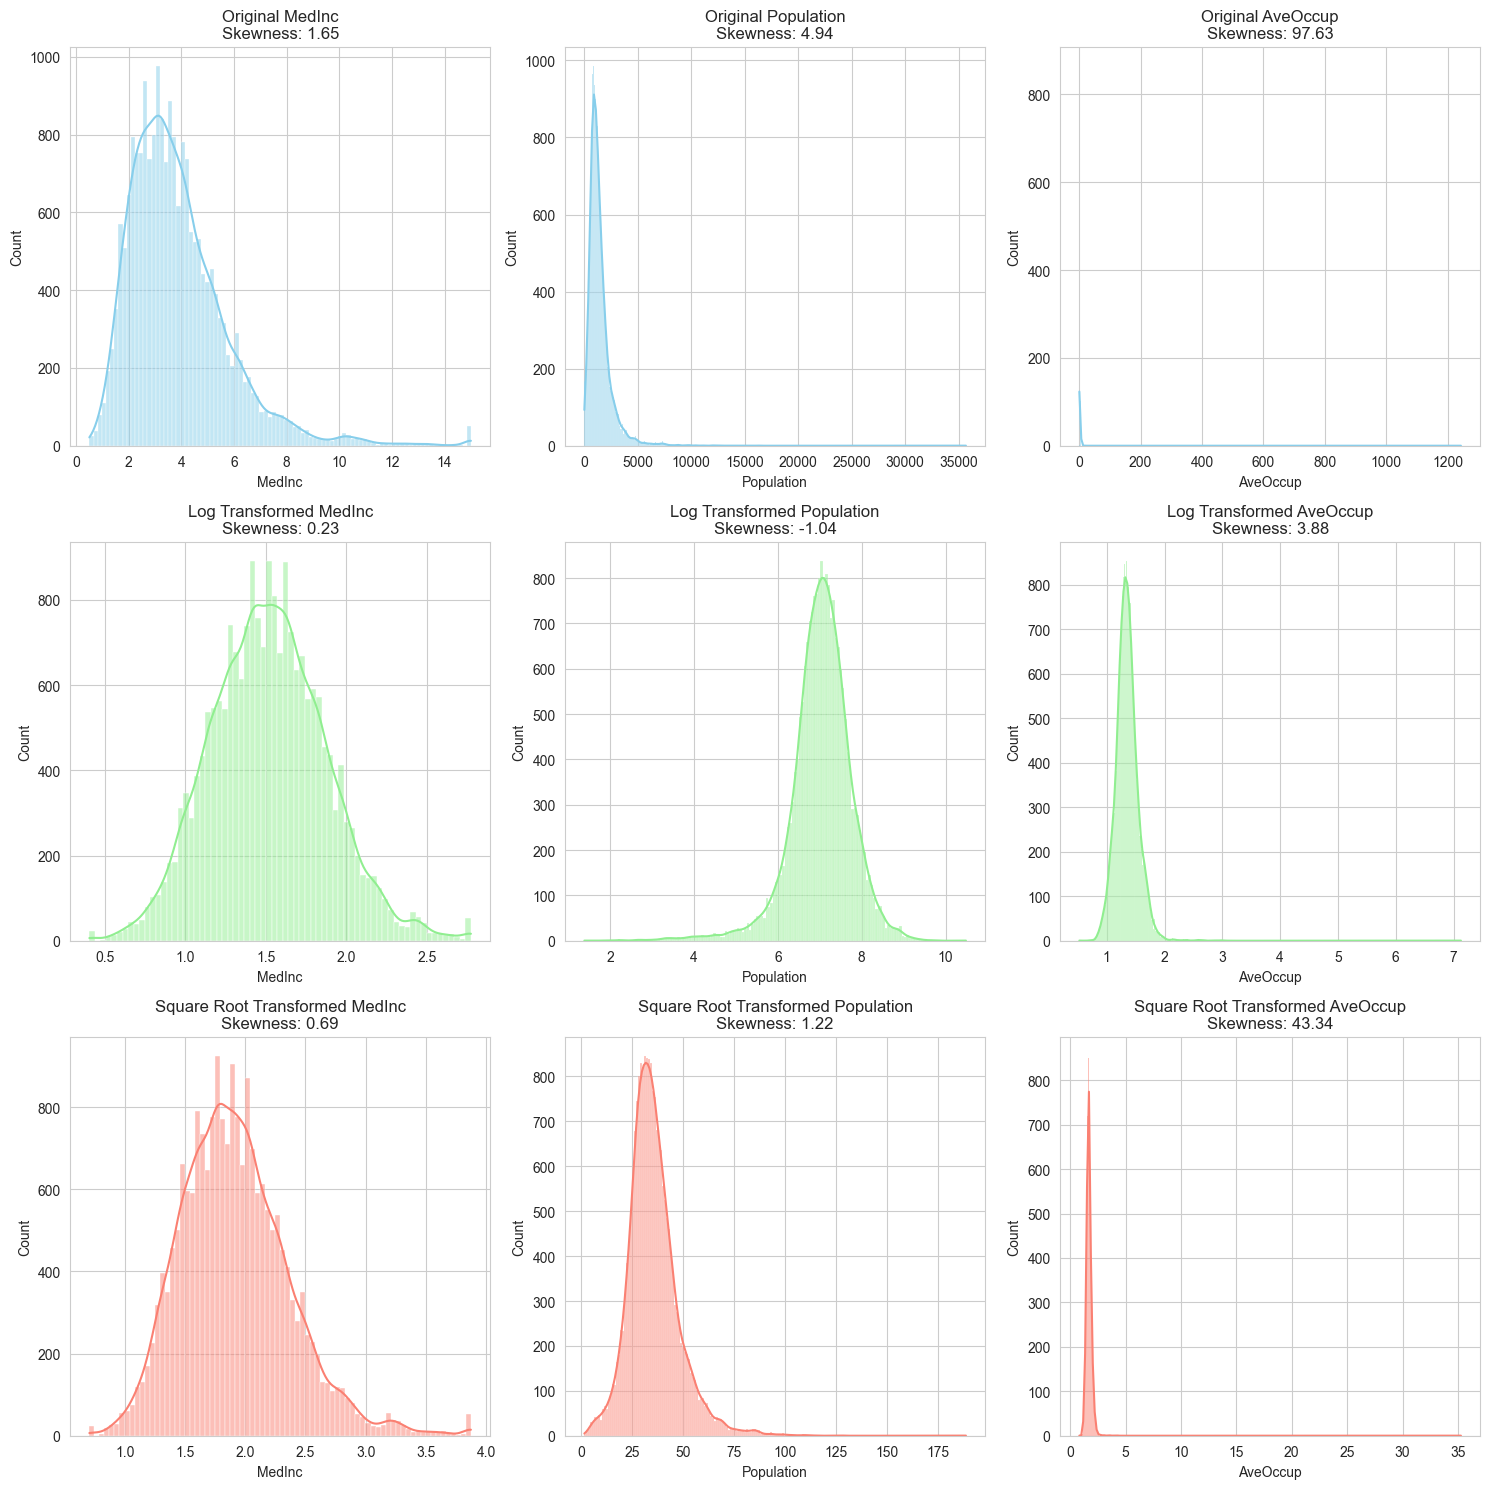

In [28]:
# Demonstrate data transformation for non-normal data
plt.figure(figsize=(15, 15))

# Select features with significant skewness
skewed_features = ['MedInc', 'Population', 'AveOccup']

for i, feature in enumerate(skewed_features):
    orig_data = housing_df[feature]
    
    # Row 1: Original Distribution
    plt.subplot(3, 3, i+1)
    sns.histplot(orig_data, kde=True, color='skyblue')
    plt.title(f'Original {feature}\nSkewness: {stats.skew(orig_data):.2f}')
    
    # Row 2: Log Transformation
    plt.subplot(3, 3, i+4)
    # Add a small constant to avoid log(0)
    log_data = np.log1p(orig_data)  # log(1+x)
    sns.histplot(log_data, kde=True, color='lightgreen')
    plt.title(f'Log Transformed {feature}\nSkewness: {stats.skew(log_data):.2f}')
    
    # Row 3: Square Root Transformation
    plt.subplot(3, 3, i+7)
    sqrt_data = np.sqrt(orig_data)
    sns.histplot(sqrt_data, kde=True, color='salmon')
    plt.title(f'Square Root Transformed {feature}\nSkewness: {stats.skew(sqrt_data):.2f}')
    
plt.tight_layout()
plt.show()

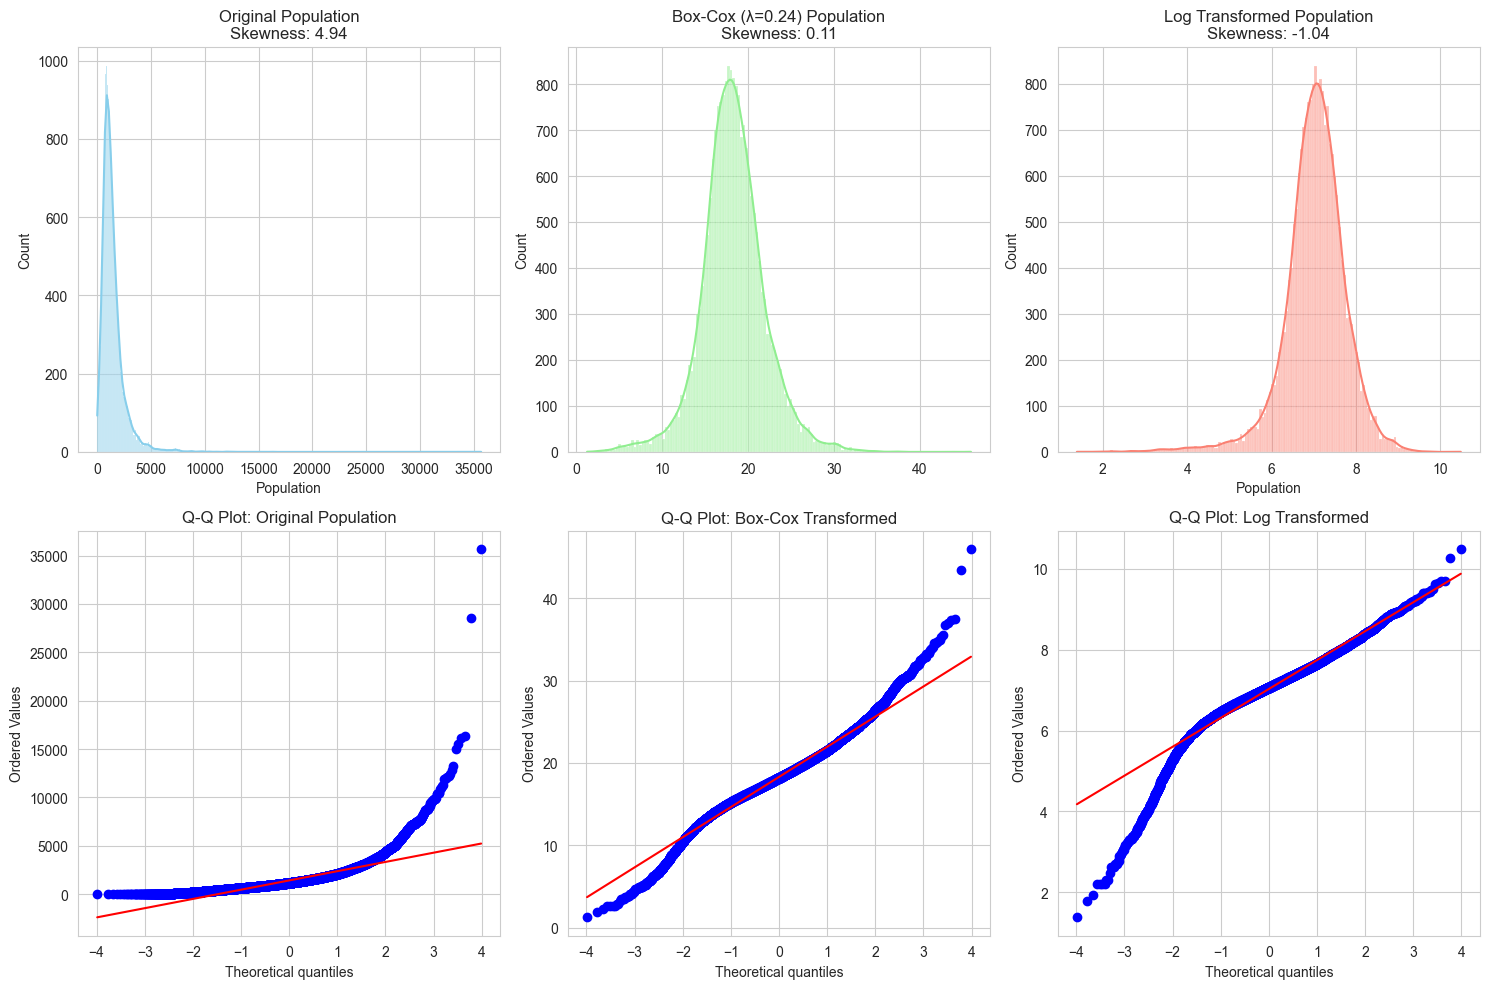

Feature: Population
Original Shapiro p-value: 0.000000
Box-Cox Transformed Shapiro p-value: 0.000000
Log Transformed Shapiro p-value: 0.000000


In [29]:
# Box-Cox Transformation Example
from scipy.stats import boxcox

plt.figure(figsize=(15, 10))

# Select a highly skewed feature
feature = 'Population'
orig_data = housing_df[feature]

# Original Data
plt.subplot(2, 3, 1)
sns.histplot(orig_data, kde=True, color='skyblue')
plt.title(f'Original {feature}\nSkewness: {stats.skew(orig_data):.2f}')

# Box-Cox Transformation
plt.subplot(2, 3, 2)
# boxcox needs positive values
min_val = min(orig_data)
if min_val <= 0:
    adjusted_data = orig_data - min_val + 1
else:
    adjusted_data = orig_data
    
transformed_data, lambda_val = boxcox(adjusted_data)
sns.histplot(transformed_data, kde=True, color='lightgreen')
plt.title(f'Box-Cox (λ={lambda_val:.2f}) {feature}\nSkewness: {stats.skew(transformed_data):.2f}')

# Log Transformation
plt.subplot(2, 3, 3)
log_data = np.log1p(orig_data)
sns.histplot(log_data, kde=True, color='salmon')
plt.title(f'Log Transformed {feature}\nSkewness: {stats.skew(log_data):.2f}')

# Q-Q Plots
plt.subplot(2, 3, 4)
stats.probplot(orig_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot: Original {feature}')

plt.subplot(2, 3, 5)
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot: Box-Cox Transformed')

plt.subplot(2, 3, 6)
stats.probplot(log_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot: Log Transformed')

plt.tight_layout()
plt.show()

# Compare normality tests before and after transformation
print(f"Feature: {feature}")
print(f"Original Shapiro p-value: {stats.shapiro(orig_data).pvalue:.6f}")
print(f"Box-Cox Transformed Shapiro p-value: {stats.shapiro(transformed_data).pvalue:.6f}")
print(f"Log Transformed Shapiro p-value: {stats.shapiro(log_data).pvalue:.6f}")

## Summary and Key Insights

**Key Takeaways from Understanding Data Distributions:**

1. **Distribution Types**:
   - Normal distributions are symmetric and characterized by mean and standard deviation
   - Uniform distributions have constant probability within a range
   - Binomial distributions model binary outcome experiments
   - Poisson distributions model counts and rare events
   - Skewed distributions have longer tails on one side

2. **Visualization Tools**:
   - Histograms show frequency distributions
   - Density plots provide smoothed probability density estimates
   - Box plots show quartiles and outliers
   - Q-Q plots help assess if data follows a theoretical distribution

3. **Distribution Testing**:
   - Shapiro-Wilk, Anderson-Darling, and Kolmogorov-Smirnov tests check distribution assumptions
   - p-values < 0.05 typically indicate the data doesn't follow the tested distribution

4. **Transformations**:
   - Log transformation helps with right-skewed data
   - Square root is a milder transformation for right-skewed data
   - Box-Cox offers a family of power transformations

5. **Practical Implications**:
   - Many statistical tests assume normality
   - Knowing your data's distribution helps choose appropriate analytical methods
   - Transformations can help meet assumptions of parametric tests
   - Real-world data often doesn't follow perfect theoretical distributions

Understanding distributions is fundamental to data analysis, as it guides statistical testing, modeling decisions, and interpretation of results.